In [1]:
library(MASS)
install.packages("nnet")
library(nnet)
install.packages("caret")
library(caret)
library(plotmo)
library(readr)
library(faraway)
library(ggplot2)
library(glmnet)
library(e1071)

Installing package into 'C:/Users/36961/Documents/R/win-library/3.6'
(as 'lib' is unspecified)


package 'nnet' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\36961\AppData\Local\Temp\RtmpEntvRu\downloaded_packages


Warning message:
"package 'nnet' was built under R version 3.6.3"Installing package into 'C:/Users/36961/Documents/R/win-library/3.6'
(as 'lib' is unspecified)


package 'caret' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\36961\AppData\Local\Temp\RtmpEntvRu\downloaded_packages


Warning message:
"package 'caret' was built under R version 3.6.3"Loading required package: lattice
Loading required package: ggplot2
Warning message:
"package 'ggplot2' was built under R version 3.6.3"Warning message:
"package 'plotmo' was built under R version 3.6.2"Loading required package: Formula
Loading required package: plotrix
Loading required package: TeachingDemos
Warning message:
"package 'TeachingDemos' was built under R version 3.6.2"Warning message:
"package 'readr' was built under R version 3.6.3"Warning message:
"package 'faraway' was built under R version 3.6.2"
Attaching package: 'faraway'

The following object is masked from 'package:lattice':

    melanoma

Warning message:
"package 'glmnet' was built under R version 3.6.2"Loading required package: Matrix
Loaded glmnet 3.0-2

Warning message:
"package 'e1071' was built under R version 3.6.2"

# Load Data and Final Clean

In [194]:
df <- read.csv(file="cleaned_data_0330.csv",sep=",",header=TRUE)
df = df[,-1]
colnames(df)
dim(df)

[1] "X1st_Term_Funding"                 "X2nd_Term_Funding"                
 [3] "X3rd_Term_Funding"                 "X4th_Term_Funding"                
 [5] "Start_year"                        "Start_age"                        
 [7] "College"                           "Age"                              
 [9] "Degree"                            "Gender"                           
[11] "funding_indicator"                 "ID"                               
[13] "Citizenship"                       "Major_id"                         
[15] "Major"                             "net_cost"                         
[17] "Program"                           "Prep.Level"                       
[19] "Total.Charges"                     "Total.Funding.Amount"             
[21] "Y"                                 "PC1"                              
[23] "PC2"                               "PC3"                              
[25] "Term.1.GPA"                        "Term.2.GPA"                       
[27] "Term.3.GPA"                        "Term.4.GPA"                       
[29] "Term.5.GPA"                        "Term.6.GPA"                       
[31] "Term.7.GPA"                        "Term.8.GPA"                       
[33] "gap_indicator"                     "GPA_trend"                        
[35] "Valid.term"                        "Average_GPA"                      
[37] "academic_period"                   "s_College"                        
[39] "s_Citizenship"                     "SAPC1"                            
[41] "SAPC2"                             "SAPC3"                            
[43] "Average.Precol.GPA"                "GMAT.Score"                       
[45] "GRE.Combined.General.Write.Score"  "GRE.Combined.Quantitative.Score"  
[47] "GRE.Combined.General.Verbal.Score"

[1] 2470   47

In [195]:
colnames(df)

[1] "X1st_Term_Funding"                 "X2nd_Term_Funding"                
 [3] "X3rd_Term_Funding"                 "X4th_Term_Funding"                
 [5] "Start_year"                        "Start_age"                        
 [7] "College"                           "Age"                              
 [9] "Degree"                            "Gender"                           
[11] "funding_indicator"                 "ID"                               
[13] "Citizenship"                       "Major_id"                         
[15] "Major"                             "net_cost"                         
[17] "Program"                           "Prep.Level"                       
[19] "Total.Charges"                     "Total.Funding.Amount"             
[21] "Y"                                 "PC1"                              
[23] "PC2"                               "PC3"                              
[25] "Term.1.GPA"                        "Term.2.GPA"                       
[27] "Term.3.GPA"                        "Term.4.GPA"                       
[29] "Term.5.GPA"                        "Term.6.GPA"                       
[31] "Term.7.GPA"                        "Term.8.GPA"                       
[33] "gap_indicator"                     "GPA_trend"                        
[35] "Valid.term"                        "Average_GPA"                      
[37] "academic_period"                   "s_College"                        
[39] "s_Citizenship"                     "SAPC1"                            
[41] "SAPC2"                             "SAPC3"                            
[43] "Average.Precol.GPA"                "GMAT.Score"                       
[45] "GRE.Combined.General.Write.Score"  "GRE.Combined.Quantitative.Score"  
[47] "GRE.Combined.General.Verbal.Score"

In [196]:
unique(df$Citizenship)

[1] China                        White                       
 [3] Asia                         Unknown                     
 [5] India                        Europe                      
 [7] Hispanic or Latino           Black or African American   
 [9] Asian                        Africa                      
[11] Other International Students
11 Levels: Africa Asia Asian Black or African American China ... White

Scale and center some variables:

In [197]:
mean_age = mean(df$Start_age)
sd_age = sd(df$Start_age)
df$s_start_age = (df$Start_age - mean_age)/sd_age
mean_net = mean(df$net_cost)
sd_net = sd(df$net_cost)
df$s_net_cost = (df$net_cost - mean_net)/sd_net
mean_year = mean(df$Start_year)
sd_year = sd(df$Start_year)
df$s_start_year = (df$Start_year - mean_year)/sd_year

In [198]:
av_net_cost = ifelse(df$Valid.term > 0, df$net_cost / df$Valid.term, df$net_cost)
av_mean_net = mean(av_net_cost)
av_sd_net = sd(av_net_cost)
df$avs_net_cost = (av_net_cost - av_mean_net)/av_sd_net

In [199]:
mean_SAPC1 = mean(df$SAPC1)
sd_SAPC1 = sd(df$SAPC1)
df$s_SAPC1 = (df$SAPC1 - mean_SAPC1)/sd_SAPC1
mean_SAPC2 = mean(df$SAPC2)
sd_SAPC2 = sd(df$SAPC2)
df$s_SAPC2 = (df$SAPC2 - mean_SAPC2)/sd_SAPC2
mean_SAPC3 = mean(df$SAPC3)
sd_SAPC3 = sd(df$SAPC3)
df$s_SAPC3 = (df$SAPC3 - mean_SAPC3)/sd_SAPC3

In [200]:
mean_Average.Precol.GPA = mean(df$Average.Precol.GPA)
sd_Average.Precol.GPA = sd(df$Average.Precol.GPA)
df$s_Average.Precol.GPA = (df$Average.Precol.GPA - mean_Average.Precol.GPA)/sd_Average.Precol.GPA

In [201]:
mean_GRE.Combined.General.Write.Score = mean(df$GRE.Combined.General.Write.Score)
sd_GRE.Combined.General.Write.Score = sd(df$GRE.Combined.General.Write.Score)
df$s_GRE.Combined.General.Write.Score = (df$GRE.Combined.General.Write.Score - mean_GRE.Combined.General.Write.Score)/sd_GRE.Combined.General.Write.Score

In [202]:
mean_GRE.Combined.Quantitative.Score = mean(df$GRE.Combined.Quantitative.Score)
sd_GRE.Combined.Quantitative.Score = sd(df$GRE.Combined.Quantitative.Score)
df$s_GRE.Combined.Quantitative.Score = (df$GRE.Combined.Quantitative.Score - mean_GRE.Combined.Quantitative.Score)/sd_GRE.Combined.Quantitative.Score

In [203]:
mean_GRE.Combined.General.Verbal.Score = mean(df$GRE.Combined.General.Verbal.Score)
sd_GRE.Combined.General.Verbal.Score = sd(df$GRE.Combined.General.Verbal.Score)
df$s_GRE.Combined.General.Verbal.Score = (df$GRE.Combined.General.Verbal.Score - mean_GRE.Combined.General.Verbal.Score)/sd_GRE.Combined.General.Verbal.Score


In [204]:
mean_GMAT.Score = mean(df$GMAT.Score)
sd_GMAT.Score = sd(df$GMAT.Score)
df$s_GMAT.Score = (df$GMAT.Score - mean_GMAT.Score)/sd_GMAT.Score

## Seperate by School

Different Schools

In [205]:
schools = levels(factor(df$College))

In [206]:
Harpur_df = df[df$College %in% schools[1:4],]
Management_df = df[df$College=="GD Management",]
Nursing_df = df[df$College=="GD Nursing",]
Watson_df = df[df$College=="GD Watson",]

In [207]:
unique(Harpur_df$Major)

[1] Translation Studies            Chemistry                     
 [3] Behavioral Neuroscience        Cognitive Psychology          
 [5] Physics                        Mathematics                   
 [7] Comparative Literature         Educational Theory and Practic
 [9] Philosophy Interpretation and  Biological Sciences           
[11] English                        Materials Science and Engineer
[13] History                        Anthropology                  
[15] Sociology                      Material Sci and Eng-Engineerg
[17] Clinical Psychology            Economics                     
[19] Geology                        Philosophy SPEL               
[21] Political Science              Community and Public Affairs  
[23] Art History                    Materials Science and Engr    
[25] Biological Sciences EEB        X Geology                     
[27] Art History Combined MA PhD    Mechanical Engineering        
[29] Mathematics/Economics         
45 Levels: Anthropology Art History ... XGerontolog Clin Nurse Special

In [208]:
harpur_sciences <- c("Chemistry", "Behavioral Neuroscience","Cognitive Psychology","Physics","Mathematics",
                     "Biological Sciences","Materials Science and Engineer","Material Sci and Eng-Engineerg",
                     "Clinical Psychology","Economics","Geology","Political Science","Materials Science and Engr",
                     "Biological Sciences EEB", "X Geology","Mathematics/Economics")
harpur_arts <- c("Comparative Literature","Translation Studies","Educational Theory and Practic",
                 "Philosophy Interpretation and", "English","History","Anthropology","Sociology","Philosophy SPEL",
                 "Community and Public Affairs","Art History","Art History Combined MA PhD")

In [209]:
Harpur_sciences = Harpur_df[Harpur_df$Major %in% harpur_sciences,]
Harpur_arts = Harpur_df[Harpur_df$Major %in% harpur_arts,]

In [210]:
Harpur_sciences <- within(Harpur_sciences, Citizenship <- relevel(Citizenship, ref = "White"))
Harpur_arts <- within(Harpur_arts, Citizenship <- relevel(Citizenship, ref = "White"))
Management_df <- within(Management_df, Citizenship <- relevel(Citizenship, ref = "White"))
Watson_df <- within(Watson_df, Citizenship <- relevel(Citizenship, ref = "White"))
Nursing_df <- within(Nursing_df, Citizenship <- relevel(Citizenship, ref = "White"))

In [211]:
dim(Harpur_sciences)[1]
dim(Harpur_arts)[1]
dim(Harpur_df)[1]

[1] 861

[1] 918

[1] 1780

In [212]:
a_n = dim(Harpur_sciences)[1]
a_1 = sum(Harpur_sciences$Y)
a_0 = a_n - a_1
b_n = dim(Harpur_arts)[1]
b_1 = sum(Harpur_arts$Y)
b_0 = b_n - b_1
c_n = dim(Management_df)[1]
c_1 = sum(Management_df$Y)
c_0 = c_n - c_1
d_n = dim(Nursing_df)[1]
d_1 = sum(Nursing_df$Y)
d_0 = d_n - d_1
e_n = dim(Watson_df)[1]
e_1 = sum(Watson_df$Y)
e_0 = e_n - e_1
School = c("Harpur sciences","Harpur_arts","SOM","Nursing","Watson")
sch_total = c(a_n,b_n,c_n,d_n,e_n)
succ_total = c(a_1,b_1,c_1,d_1,e_1)
unsucc_total = c(a_0,b_0,c_0,d_0,e_0)
data.frame("School"=School,"Total"=sch_total,"Successful Graduates"=succ_total,"Unsuccessful Graduates"=unsucc_total)

School,Total,Successful.Graduates,Unsuccessful.Graduates
Harpur sciences,861,542,319
Harpur_arts,918,534,384
SOM,58,38,20
Nursing,117,72,45
Watson,515,343,172


In [213]:
summary(Watson_df[which(Watson_df$Y==1), ]$Citizenship)

White                       Africa 
                          46                            6 
                        Asia                        Asian 
                          92                           16 
   Black or African American                        China 
                           7                           95 
                      Europe           Hispanic or Latino 
                           8                            6 
                       India Other International Students 
                          46                            2 
                     Unknown 
                          19

In [214]:
df1 = rbind(Harpur_sciences, Harpur_arts, Management_df, Watson_df, Nursing_df)
df1

,X1st_Term_Funding,X2nd_Term_Funding,X3rd_Term_Funding,X4th_Term_Funding,Start_year,Start_age,College,Age,Degree,Gender,...,s_start_year,avs_net_cost,s_SAPC1,s_SAPC2,s_SAPC3,s_Average.Precol.GPA,s_GRE.Combined.General.Write.Score,s_GRE.Combined.Quantitative.Score,s_GRE.Combined.General.Verbal.Score,s_GMAT.Score
25,4685,4935,4110.0,432.0,2013,22.3,GD Harpur,29,Doctor of Philosophy,Male,...,0.85901134,-0.65494776,-1.125434e-01,2.107395e-10,-3.004692e-01,9.450694e-02,-0.5485791332,8.546803e-02,3.279657e-01,0.008539859
27,4685,4685,3699.0,3699.0,2012,22.0,GD Harpur,29,Doctor of Philosophy,Female,...,0.64687796,-0.68741906,4.148709e-01,2.107395e-10,6.817704e-01,2.832543e-02,0.3180845011,-1.204902e-01,-5.110037e-01,0.008539859
28,4685,4685,3699.0,3699.0,2012,23.0,GD Harpur,30,Doctor of Philosophy,Female,...,0.64687796,-0.68693362,-4.260311e-01,2.107395e-10,4.663449e+00,1.732499e+00,2.9180754037,8.546803e-02,9.733268e-01,0.008539859
35,3699,3699,432.0,432.0,2013,23.0,GD Harpur,29,Doctor of Philosophy,Male,...,0.85901134,3.58982146,-2.066100e-01,2.107395e-10,1.417915e-01,-9.643972e-01,0.3180845011,8.546803e-02,5.215741e-01,0.008539859
36,8325,8325,925.0,925.0,2013,23.0,GD Harpur,29,Doctor of Philosophy,Female,...,0.85901134,-0.65240349,1.034529e-05,3.289252e+00,4.293910e-01,7.894128e-01,-1.4152427674,4.458950e-01,9.733268e-01,0.008539859
38,0,0,3141.0,3141.0,2008,22.0,GD Harpur,33,Doctor of Philosophy,Female,...,-0.20165553,-0.24715426,-9.409784e-10,2.107395e-10,-2.179561e-10,-2.545443e-07,0.0000189473,4.961343e-07,-3.187613e-07,0.008539859
47,0,0,3141.0,3141.0,2008,33.0,GD Harpur,44,Doctor of Philosophy,Male,...,-0.20165553,-0.38651183,-9.409784e-10,2.107395e-10,-2.179561e-10,-2.545443e-07,0.0000189473,4.961343e-07,-3.187613e-07,0.008539859
50,0,0,4968.0,4968.0,2008,22.0,GD Harpur,33,Doctor of Philosophy,Female,...,-0.20165553,-0.18483851,-9.409784e-10,2.107395e-10,-2.179561e-10,-2.545443e-07,0.0000189473,4.961343e-07,-3.187613e-07,0.008539859
53,4968,6072,5166.0,5683.2,2009,24.0,GD Grad School,34,Doctor of Philosophy,Male,...,0.01047784,-0.05227148,8.055970e-07,2.107395e-10,3.340649e-02,6.141618e-02,0.0000189473,4.961343e-07,-3.187613e-07,0.008539859
56,0,0,0.0,4968.0,2008,23.3,GD Harpur,35,Doctor of Philosophy,Female,...,-0.20165553,-0.07151431,-9.409784e-10,2.107395e-10,-2.179561e-10,-2.545443e-07,0.0000189473,4.961343e-07,-3.187613e-07,0.008539859


# Harpur Sciences Analysis

Won't use Degree column since it does not accurately show the student's major

<b> Logistic regression model:

In [22]:
log_mod_h_s = glm(Y~s_start_age+factor(Gender)+factor(funding_indicator)+factor(Citizenship)+
                avs_net_cost+s_Average.Precol.GPA+s_GRE.Combined.General.Write.Score+s_GRE.Combined.Quantitative.Score+s_GRE.Combined.General.Verbal.Score+
                factor(gap_indicator)+GPA_trend+s_start_year,
                data=Harpur_sciences,family="binomial")
summary(log_mod_h_s)


Call:
glm(formula = Y ~ s_start_age + factor(Gender) + factor(funding_indicator) + 
    factor(Citizenship) + avs_net_cost + s_Average.Precol.GPA + 
    s_GRE.Combined.General.Write.Score + s_GRE.Combined.Quantitative.Score + 
    s_GRE.Combined.General.Verbal.Score + factor(gap_indicator) + 
    GPA_trend + s_start_year, family = "binomial", data = Harpur_sciences)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.2437  -0.9592   0.5585   0.8648   2.1207  

Coefficients:
                                                 Estimate Std. Error z value
(Intercept)                                     -0.436360   0.260852  -1.673
s_start_age                                      0.150515   0.149366   1.008
factor(Gender)Male                              -0.004027   0.165234  -0.024
factor(funding_indicator)1                       1.295113   0.256252   5.054
factor(Citizenship)Africa                        0.978364   0.479821   2.039
factor(Citizenship)Asia                

<b> Significant Variables of logistic regression model: 

In [23]:
round(summary(log_mod_h_s)$coeff[which(summary(log_mod_h_s)$coef[,4] <= .05),c(1,4)],5)

,Estimate,Pr(>|z|)
factor(funding_indicator)1,1.29511,0.00000
factor(Citizenship)Africa,0.97836,0.04145
factor(Citizenship)China,0.53363,0.03350
GPA_trend,1.07370,0.01182
s_start_year,-1.34129,0.00000


Things we need
-  Run AIC/BIC stepwise model selection for Harpur and summarize results
-  Repeat for the other schools

<b> Both AIC:

In [24]:
library('MASS')
log_mod_h_s_aic = stepAIC(log_mod_h_s, direction = 'both')

Start:  AIC=997.96
Y ~ s_start_age + factor(Gender) + factor(funding_indicator) + 
    factor(Citizenship) + avs_net_cost + s_Average.Precol.GPA + 
    s_GRE.Combined.General.Write.Score + s_GRE.Combined.Quantitative.Score + 
    s_GRE.Combined.General.Verbal.Score + factor(gap_indicator) + 
    GPA_trend + s_start_year

                                      Df Deviance     AIC
- factor(Citizenship)                 10   970.03  994.03
- factor(Gender)                       1   953.96  995.96
- s_GRE.Combined.Quantitative.Score    1   953.96  995.96
- s_GRE.Combined.General.Write.Score   1   954.02  996.02
- s_GRE.Combined.General.Verbal.Score  1   954.07  996.07
- s_Average.Precol.GPA                 1   954.27  996.27
- s_start_age                          1   954.98  996.98
<none>                                     953.96  997.96
- avs_net_cost                         1   956.21  998.21
- factor(gap_indicator)                1   957.71  999.71
- GPA_trend                            

<b> Significant variables both AIC selects:

In [25]:
round(summary(log_mod_h_s_aic)$coeff[which(summary(log_mod_h_s_aic)$coef[,4] <= .05),c(1,4)],5)

,Estimate,Pr(>|z|)
factor(funding_indicator)1,1.24768,0.00000
GPA_trend,0.96399,0.01727
s_start_year,-1.35272,0.00000


<b> Both BIC

In [26]:
log_mod_h_s_bic = stepAIC(log_mod_h_s, direction = "both", k = log(a_n))

Start:  AIC=1102.64
Y ~ s_start_age + factor(Gender) + factor(funding_indicator) + 
    factor(Citizenship) + avs_net_cost + s_Average.Precol.GPA + 
    s_GRE.Combined.General.Write.Score + s_GRE.Combined.Quantitative.Score + 
    s_GRE.Combined.General.Verbal.Score + factor(gap_indicator) + 
    GPA_trend + s_start_year

                                      Df Deviance    AIC
- factor(Citizenship)                 10   970.03 1051.1
- factor(Gender)                       1   953.96 1095.9
- s_GRE.Combined.Quantitative.Score    1   953.96 1095.9
- s_GRE.Combined.General.Write.Score   1   954.02 1095.9
- s_GRE.Combined.General.Verbal.Score  1   954.07 1096.0
- s_Average.Precol.GPA                 1   954.27 1096.2
- s_start_age                          1   954.98 1096.9
- avs_net_cost                         1   956.21 1098.1
- factor(gap_indicator)                1   957.71 1099.6
<none>                                     953.96 1102.6
- GPA_trend                            1   960.96


Step:  AIC=1011.54
Y ~ factor(funding_indicator) + avs_net_cost + GPA_trend + s_start_year

                                      Df Deviance    AIC
- avs_net_cost                         1   980.78 1007.8
- GPA_trend                            1   983.93 1011.0
<none>                                     977.75 1011.5
+ factor(gap_indicator)                1   974.64 1015.2
+ s_GRE.Combined.General.Write.Score   1   975.85 1016.4
+ s_start_age                          1   975.89 1016.4
+ s_GRE.Combined.Quantitative.Score    1   977.16 1017.7
+ s_GRE.Combined.General.Verbal.Score  1   977.74 1018.3
+ s_Average.Precol.GPA                 1   977.75 1018.3
+ factor(Gender)                       1   977.75 1018.3
- factor(funding_indicator)            1  1003.94 1031.0
+ factor(Citizenship)                 10   959.41 1060.8
- s_start_year                         1  1119.26 1146.3

Step:  AIC=1007.81
Y ~ factor(funding_indicator) + GPA_trend + s_start_year

                               

<b> Significant variables both BIC selects:

In [27]:
round(summary(log_mod_h_s_bic)$coeff[which(summary(log_mod_h_s_bic)$coef[,4] <= .05),c(1,4)],5)

,Estimate,Pr(>|z|)
factor(funding_indicator)1,1.18085,0
s_start_year,-1.38659,0


# Harpur Arts Analysis

<b> Logistic regression model:

In [28]:
log_mod_h_a = glm(Y~s_start_age+factor(Gender)+factor(funding_indicator)+factor(Citizenship)+
                avs_net_cost+s_Average.Precol.GPA+s_GRE.Combined.General.Write.Score+s_GRE.Combined.Quantitative.Score+s_GRE.Combined.General.Verbal.Score+factor(gap_indicator)+GPA_trend+s_start_year,
                data=Harpur_arts,family="binomial")
summary(log_mod_h_a)


Call:
glm(formula = Y ~ s_start_age + factor(Gender) + factor(funding_indicator) + 
    factor(Citizenship) + avs_net_cost + s_Average.Precol.GPA + 
    s_GRE.Combined.General.Write.Score + s_GRE.Combined.Quantitative.Score + 
    s_GRE.Combined.General.Verbal.Score + factor(gap_indicator) + 
    GPA_trend + s_start_year, family = "binomial", data = Harpur_arts)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.0747  -1.1505   0.7573   0.9953   1.7514  

Coefficients:
                                                 Estimate Std. Error z value
(Intercept)                                     -0.310246   0.173581  -1.787
s_start_age                                      0.107226   0.071319   1.503
factor(Gender)Male                               0.031559   0.145284   0.217
factor(funding_indicator)1                       0.714213   0.172699   4.136
factor(Citizenship)Africa                       -0.470445   0.536178  -0.877
factor(Citizenship)Asia                    

<b> Significant Variables of logistic regression model: 

In [29]:
round(summary(log_mod_h_a)$coeff[which(summary(log_mod_h_a)$coef[,4] <= .05),c(1,4)],5)

,Estimate,Pr(>|z|)
factor(funding_indicator)1,0.71421,0.00004
factor(Citizenship)Asia,0.62205,0.00976
s_Average.Precol.GPA,0.18882,0.02234
s_start_year,-0.48137,0.00000


<b> Both AIC:

In [30]:
log_mod_h_a_aic = stepAIC(log_mod_h_a, direction = 'both')

Start:  AIC=1205.55
Y ~ s_start_age + factor(Gender) + factor(funding_indicator) + 
    factor(Citizenship) + avs_net_cost + s_Average.Precol.GPA + 
    s_GRE.Combined.General.Write.Score + s_GRE.Combined.Quantitative.Score + 
    s_GRE.Combined.General.Verbal.Score + factor(gap_indicator) + 
    GPA_trend + s_start_year

                                      Df Deviance    AIC
- factor(Citizenship)                 10   1173.6 1197.6
- avs_net_cost                         1   1161.6 1203.6
- factor(Gender)                       1   1161.6 1203.6
- s_GRE.Combined.Quantitative.Score    1   1162.0 1204.0
- s_GRE.Combined.General.Write.Score   1   1162.2 1204.2
- factor(gap_indicator)                1   1162.3 1204.3
<none>                                     1161.5 1205.5
- GPA_trend                            1   1163.6 1205.6
- s_start_age                          1   1163.8 1205.8
- s_GRE.Combined.General.Verbal.Score  1   1164.4 1206.4
- s_Average.Precol.GPA                 1   1167.4

<b> Significant variables both AIC selects:

In [31]:
round(summary(log_mod_h_a_aic)$coeff[which(summary(log_mod_h_a_aic)$coef[,4] <= .05),c(1,4)],5)

,Estimate,Pr(>|z|)
factor(funding_indicator)1,0.65119,0.00006
s_Average.Precol.GPA,0.17695,0.02501
s_start_year,-0.47224,0.00000


<b> Both BIC

In [32]:
log_mod_h_a_bic = stepAIC(log_mod_h_a, direction = "both", k = log(b_n))

Start:  AIC=1311.64
Y ~ s_start_age + factor(Gender) + factor(funding_indicator) + 
    factor(Citizenship) + avs_net_cost + s_Average.Precol.GPA + 
    s_GRE.Combined.General.Write.Score + s_GRE.Combined.Quantitative.Score + 
    s_GRE.Combined.General.Verbal.Score + factor(gap_indicator) + 
    GPA_trend + s_start_year

                                      Df Deviance    AIC
- factor(Citizenship)                 10   1173.6 1255.5
- avs_net_cost                         1   1161.6 1304.8
- factor(Gender)                       1   1161.6 1304.9
- s_GRE.Combined.Quantitative.Score    1   1162.0 1305.3
- s_GRE.Combined.General.Write.Score   1   1162.2 1305.4
- factor(gap_indicator)                1   1162.3 1305.6
- GPA_trend                            1   1163.6 1306.9
- s_start_age                          1   1163.8 1307.1
- s_GRE.Combined.General.Verbal.Score  1   1164.4 1307.7
- s_Average.Precol.GPA                 1   1167.4 1310.7
<none>                                     1161.5


Step:  AIC=1215.78
Y ~ factor(funding_indicator) + s_Average.Precol.GPA + s_GRE.Combined.General.Verbal.Score + 
    s_start_year

                                      Df Deviance    AIC
- s_Average.Precol.GPA                 1   1186.0 1213.3
<none>                                     1181.7 1215.8
- s_GRE.Combined.General.Verbal.Score  1   1190.9 1218.2
+ s_GRE.Combined.General.Write.Score   1   1178.1 1219.0
+ s_GRE.Combined.Quantitative.Score    1   1179.4 1220.3
+ s_start_age                          1   1180.0 1221.0
+ GPA_trend                            1   1180.3 1221.2
+ factor(gap_indicator)                1   1180.8 1221.7
+ avs_net_cost                         1   1181.7 1222.6
+ factor(Gender)                       1   1181.7 1222.6
- factor(funding_indicator)            1   1197.1 1224.4
- s_start_year                         1   1231.0 1258.3
+ factor(Citizenship)                 10   1168.5 1270.8

Step:  AIC=1213.29
Y ~ factor(funding_indicator) + s_GRE.Combined.Gen

<b> Significant variables both BIC selects:

In [33]:
round(summary(log_mod_h_a_bic)$coeff[which(summary(log_mod_h_a_bic)$coef[,4] <= .05),c(1,4)],5)

,Estimate,Pr(>|z|)
factor(funding_indicator)1,0.64293,0.00006
s_GRE.Combined.General.Verbal.Score,-0.54242,0.03417
s_start_year,-0.48063,0.00000


# Management Analysis

<b> Logistic regression model:

In [154]:
log_mod_m = glm(Y~s_start_age+factor(Gender)+factor(Citizenship)+s_GMAT.Score
                avs_net_cost+s_Average.Precol.GPA+s_GRE.Combined.General.Write.Score+s_GRE.Combined.Quantitative.Score+s_GRE.Combined.General.Verbal.Score+factor(gap_indicator)+GPA_trend+s_start_year,
                data=Management_df,family="binomial")
summary(log_mod_m)


Call:
glm(formula = Y ~ s_start_age + factor(Gender) + factor(Citizenship) + 
    s_GMAT.Score + avs_net_cost + s_Average.Precol.GPA + s_GRE.Combined.General.Write.Score + 
    s_GRE.Combined.Quantitative.Score + s_GRE.Combined.General.Verbal.Score + 
    factor(gap_indicator) + GPA_trend + s_start_year, family = "binomial", 
    data = Management_df)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.1745  -0.4835   0.3336   0.7903   1.4576  

Coefficients:
                                        Estimate Std. Error z value Pr(>|z|)
(Intercept)                              1.64214    1.27631   1.287    0.198
s_start_age                              0.51754    0.77735   0.666    0.506
factor(Gender)Male                      -1.39985    0.88531  -1.581    0.114
factor(Citizenship)Asia                  0.67052    1.19547   0.561    0.575
factor(Citizenship)Asian                 1.22060    1.79593   0.680    0.497
factor(Citizenship)China                 0.45678    1.

<b> Significant Variables of logistic regression model: 

In [155]:
round(summary(log_mod_m)$coeff[which(summary(log_mod_m)$coef[,4] <= .05),c(1,4)],5)

Estimate,Pr(>|z|)


<b> Both AIC:

In [156]:
log_mod_m_aic= stepAIC(log_mod_m, direction = 'both')

Start:  AIC=89.15
Y ~ s_start_age + factor(Gender) + factor(Citizenship) + s_GMAT.Score + 
    avs_net_cost + s_Average.Precol.GPA + s_GRE.Combined.General.Write.Score + 
    s_GRE.Combined.Quantitative.Score + s_GRE.Combined.General.Verbal.Score + 
    factor(gap_indicator) + GPA_trend + s_start_year

                                      Df Deviance    AIC
- factor(Citizenship)                  7   52.404 76.404
- s_start_year                         1   51.188 87.188
- s_GRE.Combined.General.Verbal.Score  1   51.588 87.588
- s_start_age                          1   51.601 87.601
- s_GMAT.Score                         1   51.673 87.673
- GPA_trend                            1   52.201 88.201
- s_Average.Precol.GPA                 1   52.674 88.674
- avs_net_cost                         1   52.896 88.896
<none>                                     51.148 89.148
- factor(gap_indicator)                1   53.758 89.758
- factor(Gender)                       1   53.861 89.861
- s_GRE.Comb

                                      Df Deviance    AIC
<none>                                     58.518 68.518
+ avs_net_cost                         1   56.887 68.887
+ factor(Gender)                       1   57.102 69.102
- s_GRE.Combined.Quantitative.Score    1   61.508 69.508
+ s_Average.Precol.GPA                 1   57.857 69.857
+ s_start_year                         1   57.930 69.930
- factor(gap_indicator)                1   62.051 70.051
- GPA_trend                            1   62.239 70.239
+ s_start_age                          1   58.259 70.259
+ s_GMAT.Score                         1   58.394 70.394
+ s_GRE.Combined.General.Verbal.Score  1   58.517 70.517
- s_GRE.Combined.General.Write.Score   1   66.143 74.143
+ factor(Citizenship)                  7   57.034 81.034


<b> Significant variables both AIC selects:

In [157]:
summary(log_mod_m_aic)


Call:
glm(formula = Y ~ s_GRE.Combined.General.Write.Score + s_GRE.Combined.Quantitative.Score + 
    factor(gap_indicator) + GPA_trend, family = "binomial", data = Management_df)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.1061  -0.5955   0.7423   0.8650   1.0392  

Coefficients:
                                    Estimate Std. Error z value Pr(>|z|)  
(Intercept)                           0.7832     0.3351   2.337   0.0194 *
s_GRE.Combined.General.Write.Score    2.2017     1.1743   1.875   0.0608 .
s_GRE.Combined.Quantitative.Score     6.4343     4.5623   1.410   0.1584  
factor(gap_indicator)1               16.8160  1765.0790   0.010   0.9924  
GPA_trend                             2.8072     1.6378   1.714   0.0865 .
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 74.726  on 57  degrees of freedom
Residual deviance: 58.518  on 53  degrees of freedom
AIC: 68.

<b> Both BIC:

In [158]:
log_mod_m_bic = stepAIC(log_mod_m, direction = "both", k = log(c_n))

Start:  AIC=128.3
Y ~ s_start_age + factor(Gender) + factor(Citizenship) + s_GMAT.Score + 
    avs_net_cost + s_Average.Precol.GPA + s_GRE.Combined.General.Write.Score + 
    s_GRE.Combined.Quantitative.Score + s_GRE.Combined.General.Verbal.Score + 
    factor(gap_indicator) + GPA_trend + s_start_year

                                      Df Deviance    AIC
- factor(Citizenship)                  7   52.404 101.13
- s_start_year                         1   51.188 124.28
- s_GRE.Combined.General.Verbal.Score  1   51.588 124.68
- s_start_age                          1   51.601 124.69
- s_GMAT.Score                         1   51.673 124.76
- GPA_trend                            1   52.201 125.29
- s_Average.Precol.GPA                 1   52.674 125.76
- avs_net_cost                         1   52.896 125.98
- factor(gap_indicator)                1   53.758 126.85
- factor(Gender)                       1   53.861 126.95
- s_GRE.Combined.Quantitative.Score    1   54.670 127.76
- s_GRE.Comb


Step:  AIC=78.82
Y ~ s_GRE.Combined.General.Write.Score + s_GRE.Combined.Quantitative.Score + 
    factor(gap_indicator) + GPA_trend

                                      Df Deviance     AIC
- s_GRE.Combined.Quantitative.Score    1   61.508  77.750
- factor(gap_indicator)                1   62.051  78.293
- GPA_trend                            1   62.239  78.480
<none>                                     58.518  78.820
+ avs_net_cost                         1   56.887  81.250
+ factor(Gender)                       1   57.102  81.465
+ s_Average.Precol.GPA                 1   57.857  82.220
+ s_start_year                         1   57.930  82.293
- s_GRE.Combined.General.Write.Score   1   66.143  82.384
+ s_start_age                          1   58.259  82.622
+ s_GMAT.Score                         1   58.394  82.757
+ s_GRE.Combined.General.Verbal.Score  1   58.517  82.880
+ factor(Citizenship)                  7   57.034 105.759

Step:  AIC=77.75
Y ~ s_GRE.Combined.General.Write.Sc

<b> Significant variables both BIC selects:

In [159]:
round(summary(log_mod_m_bic)$coeff[which(summary(log_mod_m_bic)$coef[,4] <= .05),c(1,4)],5)
summary(log_mod_m_bic)

Estimate Pr(>|z|) 
 0.85495  0.01084


Call:
glm(formula = Y ~ s_GRE.Combined.General.Write.Score + factor(gap_indicator) + 
    GPA_trend, family = "binomial", data = Management_df)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.1667  -0.8056   0.7367   0.8419   1.5918  

Coefficients:
                                    Estimate Std. Error z value Pr(>|z|)  
(Intercept)                           0.8550     0.3356   2.548   0.0108 *
s_GRE.Combined.General.Write.Score    1.2446     0.6510   1.912   0.0559 .
factor(gap_indicator)1               17.2275  1653.2598   0.010   0.9917  
GPA_trend                             2.9614     1.5818   1.872   0.0612 .
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 74.726  on 57  degrees of freedom
Residual deviance: 61.508  on 54  degrees of freedom
AIC: 69.508

Number of Fisher Scoring iterations: 16


# Nursing Analysis

<b> Logistic regression model:

In [40]:
log_mod_n = glm(Y~s_start_age+factor(Gender)+factor(funding_indicator)+factor(Citizenship)+
                avs_net_cost+s_Average.Precol.GPA+s_GRE.Combined.General.Write.Score+s_GRE.Combined.Quantitative.Score+s_GRE.Combined.General.Verbal.Score+factor(gap_indicator)+GPA_trend+s_start_year,
                data=Nursing_df,family="binomial")
summary(log_mod_n)

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


Call:
glm(formula = Y ~ s_start_age + factor(Gender) + factor(funding_indicator) + 
    factor(Citizenship) + avs_net_cost + s_Average.Precol.GPA + 
    s_GRE.Combined.General.Write.Score + s_GRE.Combined.Quantitative.Score + 
    s_GRE.Combined.General.Verbal.Score + factor(gap_indicator) + 
    GPA_trend + s_start_year, family = "binomial", data = Nursing_df)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-2.33232  -0.93314   0.00028   0.92340   1.75450  

Coefficients:
                                               Estimate Std. Error z value
(Intercept)                                   5.458e-01  5.240e-01   1.042
s_start_age                                  -1.609e-01  1.700e-01  -0.947
factor(Gender)Male                            1.380e-01  7.476e-01   0.185
factor(funding_indicator)1                    6.545e-01  5.232e-01   1.251
factor(Citizenship)Africa                     2.039e+01  1.511e+04   0.001
factor(Citizenship)Asia                       

<b> Significant Variables of logistic regression model: 

In [41]:
round(summary(log_mod_n)$coeff[which(summary(log_mod_n)$coef[,4] <= .05),c(1,4)],5)

Estimate Pr(>|z|) 
-0.83314  0.00808

<b> Both AIC:

In [42]:
log_mod_n_aic= stepAIC(log_mod_n, direction = 'both')

Start:  AIC=156.63
Y ~ s_start_age + factor(Gender) + factor(funding_indicator) + 
    factor(Citizenship) + avs_net_cost + s_Average.Precol.GPA + 
    s_GRE.Combined.General.Write.Score + s_GRE.Combined.Quantitative.Score + 
    s_GRE.Combined.General.Verbal.Score + factor(gap_indicator) + 
    GPA_trend + s_start_year



Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

                                      Df Deviance    AIC
- factor(Citizenship)                  7   127.47 151.47
- avs_net_cost                         1   118.64 154.64
- factor(Gender)                       1   118.67 154.67
- GPA_trend                            1   118.72 154.72
- factor(gap_indicator)                1   119.35 155.35
- s_start_age                          1   119.54 155.54
- s_GRE.Combined.General.Verbal.Score  1   119.92 155.92
- factor(funding_indicator)            1   120.24 156.24
- s_GRE.Combined.General.Write.Score   1   120.36 156.36
<none>                                     118.63 156.63
- s_Average.Precol.GPA                 1   121.58 157.58
- s_GRE.Combined.Quantitative.Score    1   126.49 162.49
- s_start_year                         1   128.54 164.54


Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


Step:  AIC=151.46
Y ~ s_start_age + factor(Gender) + factor(funding_indicator) + 
    avs_net_cost + s_Average.Precol.GPA + s_GRE.Combined.General.Write.Score + 
    s_GRE.Combined.Quantitative.Score + s_GRE.Combined.General.Verbal.Score + 
    factor(gap_indicator) + GPA_trend + s_start_year



Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

                                      Df Deviance    AIC
- factor(Gender)                       1   127.47 149.47
- avs_net_cost                         1   127.47 149.47
- GPA_trend                            1   127.65 149.65
- s_start_age                          1   127.84 149.84
- s_Average.Precol.GPA                 1   129.12 151.12
- factor(funding_indicator)            1   129.19 151.19
<none>                                     127.47 151.47
- s_GRE.Combined.General.Verbal.Score  1   129.50 151.50
- factor(gap_indicator)                1   129.54 151.54
- s_GRE.Combined.General.Write.Score   1   129.69 151.69
+ factor(Citizenship)                  7   118.63 156.63
- s_GRE.Combined.Quantitative.Score    1   137.11 159.11
- s_start_year                         1   138.33 160.33


Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


Step:  AIC=149.46
Y ~ s_start_age + factor(funding_indicator) + avs_net_cost + 
    s_Average.Precol.GPA + s_GRE.Combined.General.Write.Score + 
    s_GRE.Combined.Quantitative.Score + s_GRE.Combined.General.Verbal.Score + 
    factor(gap_indicator) + GPA_trend + s_start_year



Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

                                      Df Deviance    AIC
- avs_net_cost                         1   127.47 147.47
- GPA_trend                            1   127.65 147.65
- s_start_age                          1   127.84 147.84
- factor(funding_indicator)            1   129.20 149.20
- s_Average.Precol.GPA                 1   129.25 149.25
<none>                                     127.47 149.47
- factor(gap_indicator)                1   129.55 149.55
- s_GRE.Combined.General.Verbal.Score  1   129.57 149.57
- s_GRE.Combined.General.Write.Score   1   129.84 149.84
+ factor(Gender)                       1   127.47 151.47
+ factor(Citizenship)                  7   118.67 154.67
- s_GRE.Combined.Quantitative.Score    1   137.11 157.11
- s_start_year                         1   138.37 158.37


Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


Step:  AIC=147.47
Y ~ s_start_age + factor(funding_indicator) + s_Average.Precol.GPA + 
    s_GRE.Combined.General.Write.Score + s_GRE.Combined.Quantitative.Score + 
    s_GRE.Combined.General.Verbal.Score + factor(gap_indicator) + 
    GPA_trend + s_start_year



Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

                                      Df Deviance    AIC
- GPA_trend                            1   127.65 145.65
- s_start_age                          1   127.85 145.85
- s_Average.Precol.GPA                 1   129.28 147.28
- factor(funding_indicator)            1   129.31 147.31
<none>                                     127.47 147.47
- factor(gap_indicator)                1   129.55 147.55
- s_GRE.Combined.General.Verbal.Score  1   129.57 147.57
- s_GRE.Combined.General.Write.Score   1   129.84 147.84
+ avs_net_cost                         1   127.47 149.47
+ factor(Gender)                       1   127.47 149.47
+ factor(Citizenship)                  7   118.68 152.68
- s_GRE.Combined.Quantitative.Score    1   137.12 155.12
- s_start_year                         1   138.83 156.83


Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


Step:  AIC=145.65
Y ~ s_start_age + factor(funding_indicator) + s_Average.Precol.GPA + 
    s_GRE.Combined.General.Write.Score + s_GRE.Combined.Quantitative.Score + 
    s_GRE.Combined.General.Verbal.Score + factor(gap_indicator) + 
    s_start_year



Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

                                      Df Deviance    AIC
- s_start_age                          1   127.98 143.98
- factor(funding_indicator)            1   129.54 145.54
<none>                                     127.65 145.65
- s_Average.Precol.GPA                 1   129.69 145.69
- s_GRE.Combined.General.Verbal.Score  1   129.77 145.77
- factor(gap_indicator)                1   129.96 145.96
- s_GRE.Combined.General.Write.Score   1   130.02 146.02
+ GPA_trend                            1   127.47 147.47
+ avs_net_cost                         1   127.65 147.65
+ factor(Gender)                       1   127.65 147.65
+ factor(Citizenship)                  7   118.77 150.77
- s_GRE.Combined.Quantitative.Score    1   137.22 153.22
- s_start_year                         1   138.84 154.84


Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


Step:  AIC=143.98
Y ~ factor(funding_indicator) + s_Average.Precol.GPA + s_GRE.Combined.General.Write.Score + 
    s_GRE.Combined.Quantitative.Score + s_GRE.Combined.General.Verbal.Score + 
    factor(gap_indicator) + s_start_year



Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

                                      Df Deviance    AIC
- s_Average.Precol.GPA                 1   129.87 143.87
<none>                                     127.98 143.98
- factor(gap_indicator)                1   130.11 144.11
- s_GRE.Combined.General.Verbal.Score  1   130.36 144.36
- factor(funding_indicator)            1   130.59 144.59
- s_GRE.Combined.General.Write.Score   1   130.65 144.65
+ s_start_age                          1   127.65 145.65
+ GPA_trend                            1   127.85 145.85
+ factor(Gender)                       1   127.97 145.97
+ avs_net_cost                         1   127.97 145.97
+ factor(Citizenship)                  7   119.69 149.69
- s_GRE.Combined.Quantitative.Score    1   138.42 152.42
- s_start_year                         1   138.93 152.93


Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


Step:  AIC=143.87
Y ~ factor(funding_indicator) + s_GRE.Combined.General.Write.Score + 
    s_GRE.Combined.Quantitative.Score + s_GRE.Combined.General.Verbal.Score + 
    factor(gap_indicator) + s_start_year



Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

                                      Df Deviance    AIC
- factor(gap_indicator)                1   131.52 143.52
<none>                                     129.87 143.87
+ s_Average.Precol.GPA                 1   127.98 143.98
- factor(funding_indicator)            1   132.31 144.31
- s_GRE.Combined.General.Verbal.Score  1   132.39 144.39
- s_GRE.Combined.General.Write.Score   1   133.02 145.02
+ GPA_trend                            1   129.52 145.52
+ s_start_age                          1   129.69 145.69
+ factor(Gender)                       1   129.81 145.81
+ avs_net_cost                         1   129.84 145.84
+ factor(Citizenship)                  7   122.74 150.74
- s_GRE.Combined.Quantitative.Score    1   140.43 152.43
- s_start_year                         1   142.03 154.03


Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


Step:  AIC=143.52
Y ~ factor(funding_indicator) + s_GRE.Combined.General.Write.Score + 
    s_GRE.Combined.Quantitative.Score + s_GRE.Combined.General.Verbal.Score + 
    s_start_year



Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

                                      Df Deviance    AIC
- factor(funding_indicator)            1   133.16 143.16
<none>                                     131.52 143.52
+ factor(gap_indicator)                1   129.87 143.87
- s_GRE.Combined.General.Verbal.Score  1   134.08 144.08
+ s_Average.Precol.GPA                 1   130.11 144.11
+ GPA_trend                            1   130.94 144.94
+ factor(Gender)                       1   131.44 145.44
+ s_start_age                          1   131.45 145.45
+ avs_net_cost                         1   131.50 145.50
- s_GRE.Combined.General.Write.Score   1   135.62 145.62
+ factor(Citizenship)                  7   123.30 149.30
- s_GRE.Combined.Quantitative.Score    1   143.34 153.34
- s_start_year                         1   143.37 153.37


Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


Step:  AIC=143.16
Y ~ s_GRE.Combined.General.Write.Score + s_GRE.Combined.Quantitative.Score + 
    s_GRE.Combined.General.Verbal.Score + s_start_year



Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

                                      Df Deviance    AIC
<none>                                     133.16 143.16
+ factor(funding_indicator)            1   131.52 143.52
+ s_Average.Precol.GPA                 1   131.74 143.74
- s_GRE.Combined.General.Verbal.Score  1   136.02 144.02
+ factor(gap_indicator)                1   132.31 144.31
+ GPA_trend                            1   132.63 144.63
+ s_start_age                          1   132.70 144.70
+ avs_net_cost                         1   133.10 145.10
+ factor(Gender)                       1   133.13 145.13
- s_GRE.Combined.General.Write.Score   1   137.34 145.34
+ factor(Citizenship)                  7   125.37 149.37
- s_GRE.Combined.Quantitative.Score    1   144.34 152.34
- s_start_year                         1   144.52 152.52


<b> Significant variables both AIC selects:

In [43]:
round(summary(log_mod_n_aic)$coeff[which(summary(log_mod_n_aic)$coef[,4] <= .05),c(1,4)],5)

,Estimate,Pr(>|z|)
(Intercept),0.59425,0.02246
s_start_year,-0.76541,0.00448


<b> Both BIC:

In [44]:
log_mod_n_bic = stepAIC(log_mod_n, direction = "both", k = log(d_n))

Start:  AIC=209.11
Y ~ s_start_age + factor(Gender) + factor(funding_indicator) + 
    factor(Citizenship) + avs_net_cost + s_Average.Precol.GPA + 
    s_GRE.Combined.General.Write.Score + s_GRE.Combined.Quantitative.Score + 
    s_GRE.Combined.General.Verbal.Score + factor(gap_indicator) + 
    GPA_trend + s_start_year



Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

                                      Df Deviance    AIC
- factor(Citizenship)                  7   127.47 184.61
- avs_net_cost                         1   118.64 204.36
- factor(Gender)                       1   118.67 204.38
- GPA_trend                            1   118.72 204.43
- factor(gap_indicator)                1   119.35 205.07
- s_start_age                          1   119.54 205.26
- s_GRE.Combined.General.Verbal.Score  1   119.92 205.64
- factor(funding_indicator)            1   120.24 205.96
- s_GRE.Combined.General.Write.Score   1   120.36 206.08
- s_Average.Precol.GPA                 1   121.58 207.30
<none>                                     118.63 209.11
- s_GRE.Combined.Quantitative.Score    1   126.49 212.21
- s_start_year                         1   128.54 214.26


Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


Step:  AIC=184.61
Y ~ s_start_age + factor(Gender) + factor(funding_indicator) + 
    avs_net_cost + s_Average.Precol.GPA + s_GRE.Combined.General.Write.Score + 
    s_GRE.Combined.Quantitative.Score + s_GRE.Combined.General.Verbal.Score + 
    factor(gap_indicator) + GPA_trend + s_start_year



Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

                                      Df Deviance    AIC
- factor(Gender)                       1   127.47 179.85
- avs_net_cost                         1   127.47 179.85
- GPA_trend                            1   127.65 180.03
- s_start_age                          1   127.84 180.22
- s_Average.Precol.GPA                 1   129.12 181.50
- factor(funding_indicator)            1   129.19 181.58
- s_GRE.Combined.General.Verbal.Score  1   129.50 181.88
- factor(gap_indicator)                1   129.54 181.92
- s_GRE.Combined.General.Write.Score   1   129.69 182.07
<none>                                     127.47 184.61
- s_GRE.Combined.Quantitative.Score    1   137.11 189.49
- s_start_year                         1   138.33 190.71
+ factor(Citizenship)                  7   118.63 209.11


Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


Step:  AIC=179.85
Y ~ s_start_age + factor(funding_indicator) + avs_net_cost + 
    s_Average.Precol.GPA + s_GRE.Combined.General.Write.Score + 
    s_GRE.Combined.Quantitative.Score + s_GRE.Combined.General.Verbal.Score + 
    factor(gap_indicator) + GPA_trend + s_start_year



Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

                                      Df Deviance    AIC
- avs_net_cost                         1   127.47 175.09
- GPA_trend                            1   127.65 175.27
- s_start_age                          1   127.84 175.46
- factor(funding_indicator)            1   129.20 176.82
- s_Average.Precol.GPA                 1   129.25 176.88
- factor(gap_indicator)                1   129.55 177.17
- s_GRE.Combined.General.Verbal.Score  1   129.57 177.19
- s_GRE.Combined.General.Write.Score   1   129.84 177.46
<none>                                     127.47 179.85
+ factor(Gender)                       1   127.47 184.61
- s_GRE.Combined.Quantitative.Score    1   137.11 184.73
- s_start_year                         1   138.37 186.00
+ factor(Citizenship)                  7   118.67 204.38


Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


Step:  AIC=175.09
Y ~ s_start_age + factor(funding_indicator) + s_Average.Precol.GPA + 
    s_GRE.Combined.General.Write.Score + s_GRE.Combined.Quantitative.Score + 
    s_GRE.Combined.General.Verbal.Score + factor(gap_indicator) + 
    GPA_trend + s_start_year



Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

                                      Df Deviance    AIC
- GPA_trend                            1   127.65 170.51
- s_start_age                          1   127.85 170.71
- s_Average.Precol.GPA                 1   129.28 172.14
- factor(funding_indicator)            1   129.31 172.17
- factor(gap_indicator)                1   129.55 172.41
- s_GRE.Combined.General.Verbal.Score  1   129.57 172.43
- s_GRE.Combined.General.Write.Score   1   129.84 172.70
<none>                                     127.47 175.09
+ avs_net_cost                         1   127.47 179.85
+ factor(Gender)                       1   127.47 179.85
- s_GRE.Combined.Quantitative.Score    1   137.12 179.98
- s_start_year                         1   138.83 181.69
+ factor(Citizenship)                  7   118.68 199.63


Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


Step:  AIC=170.51
Y ~ s_start_age + factor(funding_indicator) + s_Average.Precol.GPA + 
    s_GRE.Combined.General.Write.Score + s_GRE.Combined.Quantitative.Score + 
    s_GRE.Combined.General.Verbal.Score + factor(gap_indicator) + 
    s_start_year



Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

                                      Df Deviance    AIC
- s_start_age                          1   127.98 166.07
- factor(funding_indicator)            1   129.54 167.64
- s_Average.Precol.GPA                 1   129.69 167.79
- s_GRE.Combined.General.Verbal.Score  1   129.77 167.87
- factor(gap_indicator)                1   129.96 168.05
- s_GRE.Combined.General.Write.Score   1   130.02 168.12
<none>                                     127.65 170.51
+ GPA_trend                            1   127.47 175.09
+ avs_net_cost                         1   127.65 175.27
+ factor(Gender)                       1   127.65 175.27
- s_GRE.Combined.Quantitative.Score    1   137.22 175.31
- s_start_year                         1   138.84 176.94
+ factor(Citizenship)                  7   118.77 194.97


Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


Step:  AIC=166.07
Y ~ factor(funding_indicator) + s_Average.Precol.GPA + s_GRE.Combined.General.Write.Score + 
    s_GRE.Combined.Quantitative.Score + s_GRE.Combined.General.Verbal.Score + 
    factor(gap_indicator) + s_start_year



Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

                                      Df Deviance    AIC
- s_Average.Precol.GPA                 1   129.87 163.20
- factor(gap_indicator)                1   130.11 163.44
- s_GRE.Combined.General.Verbal.Score  1   130.36 163.69
- factor(funding_indicator)            1   130.59 163.93
- s_GRE.Combined.General.Write.Score   1   130.65 163.98
<none>                                     127.98 166.07
+ s_start_age                          1   127.65 170.51
+ GPA_trend                            1   127.85 170.71
+ factor(Gender)                       1   127.97 170.82
+ avs_net_cost                         1   127.97 170.83
- s_GRE.Combined.Quantitative.Score    1   138.42 171.76
- s_start_year                         1   138.93 172.26
+ factor(Citizenship)                  7   119.69 191.12


Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


Step:  AIC=163.2
Y ~ factor(funding_indicator) + s_GRE.Combined.General.Write.Score + 
    s_GRE.Combined.Quantitative.Score + s_GRE.Combined.General.Verbal.Score + 
    factor(gap_indicator) + s_start_year



Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

                                      Df Deviance    AIC
- factor(gap_indicator)                1   131.52 160.09
- factor(funding_indicator)            1   132.31 160.89
- s_GRE.Combined.General.Verbal.Score  1   132.39 160.96
- s_GRE.Combined.General.Write.Score   1   133.02 161.59
<none>                                     129.87 163.20
+ s_Average.Precol.GPA                 1   127.98 166.07
+ GPA_trend                            1   129.52 167.62
+ s_start_age                          1   129.69 167.79
+ factor(Gender)                       1   129.81 167.91
+ avs_net_cost                         1   129.84 167.94
- s_GRE.Combined.Quantitative.Score    1   140.43 169.00
- s_start_year                         1   142.03 170.61
+ factor(Citizenship)                  7   122.74 189.41


Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


Step:  AIC=160.09
Y ~ factor(funding_indicator) + s_GRE.Combined.General.Write.Score + 
    s_GRE.Combined.Quantitative.Score + s_GRE.Combined.General.Verbal.Score + 
    s_start_year



Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

                                      Df Deviance    AIC
- factor(funding_indicator)            1   133.16 156.97
- s_GRE.Combined.General.Verbal.Score  1   134.08 157.89
- s_GRE.Combined.General.Write.Score   1   135.62 159.43
<none>                                     131.52 160.09
+ factor(gap_indicator)                1   129.87 163.20
+ s_Average.Precol.GPA                 1   130.11 163.44
+ GPA_trend                            1   130.94 164.28
+ factor(Gender)                       1   131.44 164.78
+ s_start_age                          1   131.45 164.78
+ avs_net_cost                         1   131.50 164.84
- s_GRE.Combined.Quantitative.Score    1   143.34 167.15
- s_start_year                         1   143.37 167.19
+ factor(Citizenship)                  7   123.30 185.21


Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


Step:  AIC=156.97
Y ~ s_GRE.Combined.General.Write.Score + s_GRE.Combined.Quantitative.Score + 
    s_GRE.Combined.General.Verbal.Score + s_start_year



Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

                                      Df Deviance    AIC
- s_GRE.Combined.General.Verbal.Score  1   136.02 155.07
- s_GRE.Combined.General.Write.Score   1   137.34 156.39
<none>                                     133.16 156.97
+ factor(funding_indicator)            1   131.52 160.09
+ s_Average.Precol.GPA                 1   131.74 160.31
+ factor(gap_indicator)                1   132.31 160.89
+ GPA_trend                            1   132.63 161.20
+ s_start_age                          1   132.70 161.27
+ avs_net_cost                         1   133.10 161.67
+ factor(Gender)                       1   133.13 161.70
- s_GRE.Combined.Quantitative.Score    1   144.34 163.39
- s_start_year                         1   144.52 163.57
+ factor(Citizenship)                  7   125.37 182.51

Step:  AIC=155.07
Y ~ s_GRE.Combined.General.Write.Score + s_GRE.Combined.Quantitative.Score + 
    s_start_year



Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

                                      Df Deviance    AIC
- s_GRE.Combined.General.Write.Score   1   137.38 151.67
<none>                                     136.02 155.07
+ s_GRE.Combined.General.Verbal.Score  1   133.16 156.97
+ factor(funding_indicator)            1   134.08 157.89
+ s_Average.Precol.GPA                 1   134.49 158.30
+ s_start_age                          1   135.18 158.99
+ factor(gap_indicator)                1   135.21 159.02
+ GPA_trend                            1   135.48 159.29
+ avs_net_cost                         1   135.88 159.69
+ factor(Gender)                       1   135.99 159.80
- s_start_year                         1   146.88 161.17
- s_GRE.Combined.Quantitative.Score    1   147.59 161.87
+ factor(Citizenship)                  7   127.76 180.15

Step:  AIC=151.67
Y ~ s_GRE.Combined.Quantitative.Score + s_start_year

                                      Df Deviance    AIC
<none>                                     137.38 151.67
+ factor(fundin

<b> Significant variables both BIC selects:

In [45]:
round(summary(log_mod_n_bic)$coeff[which(summary(log_mod_n_bic)$coef[,4] <= .05),c(1,4)],5)

,Estimate,Pr(>|z|)
(Intercept),0.64429,0.00839
s_start_year,-0.74315,0.00559


# Watson Analysis 

<b> Logistic regression model:

In [46]:
log_mod_w = glm(Y~s_start_age+factor(Gender)+factor(funding_indicator)+factor(Citizenship)+
                avs_net_cost+s_Average.Precol.GPA+s_GRE.Combined.General.Write.Score+s_GRE.Combined.Quantitative.Score+s_GRE.Combined.General.Verbal.Score+factor(gap_indicator)+GPA_trend+s_start_year,
                data=Watson_df,family="binomial")
summary(log_mod_w)


Call:
glm(formula = Y ~ s_start_age + factor(Gender) + factor(funding_indicator) + 
    factor(Citizenship) + avs_net_cost + s_Average.Precol.GPA + 
    s_GRE.Combined.General.Write.Score + s_GRE.Combined.Quantitative.Score + 
    s_GRE.Combined.General.Verbal.Score + factor(gap_indicator) + 
    GPA_trend + s_start_year, family = "binomial", data = Watson_df)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.8992  -0.8096   0.5099   0.8056   1.8473  

Coefficients:
                                                  Estimate Std. Error z value
(Intercept)                                      -1.040263   0.397851  -2.615
s_start_age                                      -0.058488   0.143647  -0.407
factor(Gender)Male                                0.340448   0.274126   1.242
factor(funding_indicator)1                        2.056614   0.304657   6.751
factor(Citizenship)Africa                        15.228805 530.952812   0.029
factor(Citizenship)Asia                

<b> Significant Variables of logistic regression model: 

In [47]:
round(summary(log_mod_w)$coeff[which(summary(log_mod_w)$coef[,4] <= .05),c(1,4)],5)

,Estimate,Pr(>|z|)
(Intercept),-1.04026,0.00893
factor(funding_indicator)1,2.05661,0.00000
factor(Citizenship)Asia,0.77887,0.03647
avs_net_cost,0.34600,0.01737
s_Average.Precol.GPA,0.24882,0.03412
s_start_year,-1.03063,0.00000


<b> Both AIC:

In [48]:
log_mod_w_aic= stepAIC(log_mod_w, direction = 'both')

Start:  AIC=566.09
Y ~ s_start_age + factor(Gender) + factor(funding_indicator) + 
    factor(Citizenship) + avs_net_cost + s_Average.Precol.GPA + 
    s_GRE.Combined.General.Write.Score + s_GRE.Combined.Quantitative.Score + 
    s_GRE.Combined.General.Verbal.Score + factor(gap_indicator) + 
    GPA_trend + s_start_year

                                      Df Deviance    AIC
- factor(Citizenship)                 10   539.51 563.51
- s_GRE.Combined.General.Write.Score   1   522.14 564.14
- s_GRE.Combined.General.Verbal.Score  1   522.15 564.15
- s_start_age                          1   522.25 564.25
- s_GRE.Combined.Quantitative.Score    1   522.46 564.46
- factor(gap_indicator)                1   522.71 564.71
- factor(Gender)                       1   523.61 565.61
<none>                                     522.09 566.09
- GPA_trend                            1   525.16 567.16
- s_Average.Precol.GPA                 1   527.40 569.40
- avs_net_cost                         1   529.35 

<b> Significant variables both AIC selects:

In [49]:
round(summary(log_mod_w_aic)$coeff[which(summary(log_mod_w_aic)$coef[,4] <= .05),c(1,4)],5)

,Estimate,Pr(>|z|)
(Intercept),-0.55229,0.00780
factor(funding_indicator)1,2.06392,0.00000
avs_net_cost,0.34672,0.02120
s_Average.Precol.GPA,0.23712,0.03158
s_start_year,-1.01476,0.00000


<b> Both BIC:

In [50]:
log_mod_w_bic = stepAIC(log_mod_w, direction = "both", k = log(e_n))

Start:  AIC=659.46
Y ~ s_start_age + factor(Gender) + factor(funding_indicator) + 
    factor(Citizenship) + avs_net_cost + s_Average.Precol.GPA + 
    s_GRE.Combined.General.Write.Score + s_GRE.Combined.Quantitative.Score + 
    s_GRE.Combined.General.Verbal.Score + factor(gap_indicator) + 
    GPA_trend + s_start_year

                                      Df Deviance    AIC
- factor(Citizenship)                 10   539.51 614.44
- s_GRE.Combined.General.Write.Score   1   522.14 653.26
- s_GRE.Combined.General.Verbal.Score  1   522.15 653.28
- s_start_age                          1   522.25 653.38
- s_GRE.Combined.Quantitative.Score    1   522.46 653.59
- factor(gap_indicator)                1   522.71 653.84
- factor(Gender)                       1   523.61 654.74
- GPA_trend                            1   525.16 656.29
- s_Average.Precol.GPA                 1   527.40 658.53
<none>                                     522.09 659.46
- avs_net_cost                         1   529.35 


Step:  AIC=577.27
Y ~ factor(funding_indicator) + avs_net_cost + s_Average.Precol.GPA + 
    s_start_year

                                      Df Deviance    AIC
- s_Average.Precol.GPA                 1   551.63 576.60
<none>                                     546.05 577.27
- avs_net_cost                         1   552.85 577.82
+ s_GRE.Combined.General.Write.Score   1   543.97 581.44
+ s_GRE.Combined.General.Verbal.Score  1   544.18 581.65
+ GPA_trend                            1   544.21 581.67
+ s_GRE.Combined.Quantitative.Score    1   545.09 582.55
+ factor(Gender)                       1   545.32 582.79
+ factor(gap_indicator)                1   545.82 583.29
+ s_start_age                          1   545.98 583.44
+ factor(Citizenship)                 10   528.06 621.73
- s_start_year                         1   598.56 623.54
- factor(funding_indicator)            1   620.23 645.20

Step:  AIC=576.6
Y ~ factor(funding_indicator) + avs_net_cost + s_start_year

               

<b> Significant variables both BIC selects:

In [51]:
summary(log_mod_w_bic)


Call:
glm(formula = Y ~ factor(funding_indicator) + avs_net_cost + 
    s_start_year, family = "binomial", data = Watson_df)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.8893  -0.9101   0.5567   0.8484   1.7719  

Coefficients:
                           Estimate Std. Error z value Pr(>|z|)    
(Intercept)                 -0.5034     0.2001  -2.516   0.0119 *  
factor(funding_indicator)1   2.0988     0.2644   7.939 2.04e-15 ***
avs_net_cost                 0.3515     0.1548   2.270   0.0232 *  
s_start_year                -1.0004     0.1437  -6.963 3.34e-12 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 656.07  on 514  degrees of freedom
Residual deviance: 551.63  on 511  degrees of freedom
AIC: 559.63

Number of Fisher Scoring iterations: 4


In [52]:
round(summary(log_mod_w_bic)$coeff[which(summary(log_mod_w_bic)$coef[,4] <= .05),c(1,4)],5)

,Estimate,Pr(>|z|)
(Intercept),-0.50338,0.01188
factor(funding_indicator)1,2.09885,0.00000
avs_net_cost,0.35147,0.02320
s_start_year,-1.00040,0.00000


# Joint Analysis

<b> Logistic regression model:

In [223]:
int_chn = function(x) ifelse(x=='China',1,0)
int_afc = function(x) ifelse(x=='Africa',1,0)
int_asia = function(x) ifelse(x=='Asia',1,0)

In [224]:
df <- within(df, s_Citizenship <- relevel(s_Citizenship, ref = "White"))
df <- within(df, s_College <- relevel(s_College, ref = "GD Non-Harpur"))

In [225]:
log_mod_total = glm(Y~factor(funding_indicator)+factor(s_Citizenship)+
                avs_net_cost+s_Average.Precol.GPA+s_GRE.Combined.General.Verbal.Score+s_GRE.Combined.General.Write.Score+GPA_trend+s_start_year+factor(s_College)+avs_net_cost:factor(s_College)+
                factor(s_College):factor(s_Citizenship)+factor(s_College):s_GRE.Combined.General.Verbal.Score+factor(s_College):s_Average.Precol.GPA+factor(s_College):s_GRE.Combined.General.Write.Score,
                data=df,family="binomial")
summary(log_mod_total)


Call:
glm(formula = Y ~ factor(funding_indicator) + factor(s_Citizenship) + 
    avs_net_cost + s_Average.Precol.GPA + s_GRE.Combined.General.Verbal.Score + 
    s_GRE.Combined.General.Write.Score + GPA_trend + s_start_year + 
    factor(s_College) + avs_net_cost:factor(s_College) + factor(s_College):factor(s_Citizenship) + 
    factor(s_College):s_GRE.Combined.General.Verbal.Score + factor(s_College):s_Average.Precol.GPA + 
    factor(s_College):s_GRE.Combined.General.Write.Score, family = "binomial", 
    data = df)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.8023  -1.0996   0.6777   0.9248   1.9389  

Coefficients:
                                                               Estimate
(Intercept)                                                     0.02618
factor(funding_indicator)1                                      1.08072
factor(s_Citizenship)Africa                                     1.70099
factor(s_Citizenship)Asia                                 

<b> Significant Variables of logistic regression model:

In [227]:
round(summary(log_mod_total)$coeff[which(summary(log_mod_total)$coef[,4] <= .05),c(1,4)],5)

,Estimate,Pr(>|z|)
factor(funding_indicator)1,1.08072,0.00000
avs_net_cost,0.33120,0.00323
s_Average.Precol.GPA,0.16508,0.03466
GPA_trend,0.99588,0.00023
s_start_year,-0.81080,0.00000
factor(s_College)GD Harpur,-0.58166,0.00000
avs_net_cost:factor(s_College)GD Harpur,-0.31820,0.00967


<b> Both AIC:

In [228]:
log_mod_total_aic= stepAIC(log_mod_total, direction = 'both')

Start:  AIC=2988.15
Y ~ factor(funding_indicator) + factor(s_Citizenship) + avs_net_cost + 
    s_Average.Precol.GPA + s_GRE.Combined.General.Verbal.Score + 
    s_GRE.Combined.General.Write.Score + GPA_trend + s_start_year + 
    factor(s_College) + avs_net_cost:factor(s_College) + factor(s_College):factor(s_Citizenship) + 
    factor(s_College):s_GRE.Combined.General.Verbal.Score + factor(s_College):s_Average.Precol.GPA + 
    factor(s_College):s_GRE.Combined.General.Write.Score

                                                        Df Deviance    AIC
- factor(s_Citizenship):factor(s_College)                3   2951.6 2983.6
- s_GRE.Combined.General.Write.Score:factor(s_College)   1   2950.2 2986.2
- s_Average.Precol.GPA:factor(s_College)                 1   2950.3 2986.3
- s_GRE.Combined.General.Verbal.Score:factor(s_College)  1   2950.4 2986.4
<none>                                                       2950.2 2988.2
- avs_net_cost:factor(s_College)                         1   29

<b> Significant variables both AIC selects:

In [229]:
round(summary(log_mod_total_aic)$coeff[which(summary(log_mod_total_aic)$coef[,4] <= .05),c(1,4)],5)

,Estimate,Pr(>|z|)
factor(funding_indicator)1,1.07725,0.00000
factor(s_Citizenship)Africa,0.84144,0.00837
factor(s_Citizenship)Asia,0.53759,0.00027
avs_net_cost,0.33024,0.00326
s_Average.Precol.GPA,0.14133,0.00237
GPA_trend,1.01033,0.00018
s_start_year,-0.80751,0.00000
factor(s_College)GD Harpur,-0.57474,0.00000
avs_net_cost:factor(s_College)GD Harpur,-0.31634,0.01011


<b> Both BIC:

In [230]:
log_mod_total_bic = stepAIC(log_mod_total, direction = "both", k = log(e_n))

Start:  AIC=3068.79
Y ~ factor(funding_indicator) + factor(s_Citizenship) + avs_net_cost + 
    s_Average.Precol.GPA + s_GRE.Combined.General.Verbal.Score + 
    s_GRE.Combined.General.Write.Score + GPA_trend + s_start_year + 
    factor(s_College) + avs_net_cost:factor(s_College) + factor(s_College):factor(s_Citizenship) + 
    factor(s_College):s_GRE.Combined.General.Verbal.Score + factor(s_College):s_Average.Precol.GPA + 
    factor(s_College):s_GRE.Combined.General.Write.Score

                                                        Df Deviance    AIC
- factor(s_Citizenship):factor(s_College)                3   2951.6 3051.5
- s_GRE.Combined.General.Write.Score:factor(s_College)   1   2950.2 3062.6
- s_Average.Precol.GPA:factor(s_College)                 1   2950.3 3062.7
- s_GRE.Combined.General.Verbal.Score:factor(s_College)  1   2950.4 3062.8
<none>                                                       2950.2 3068.8
- avs_net_cost:factor(s_College)                         1   29

<b>Significant variables both BIC selects:

In [231]:
round(summary(log_mod_total_bic)$coeff[which(summary(log_mod_total_bic)$coef[,4] <= .05),c(1,4)],5)

,Estimate,Pr(>|z|)
factor(funding_indicator)1,1.06997,0.00000
factor(s_Citizenship)Africa,0.88357,0.00546
factor(s_Citizenship)Asia,0.59964,0.00002
factor(s_Citizenship)China,0.33587,0.01636
avs_net_cost,0.32281,0.00394
s_Average.Precol.GPA,0.13076,0.00429
GPA_trend,0.99930,0.00021
s_start_year,-0.80919,0.00000
factor(s_College)GD Harpur,-0.60862,0.00000
avs_net_cost:factor(s_College)GD Harpur,-0.30465,0.01291


<b>Harpur Baseline

<b> Logistic regression model:

In [234]:
df <- within(df, s_College <- relevel(s_College, ref = "GD Harpur"))

In [235]:
log_mod_total = glm(Y~factor(funding_indicator)+factor(s_Citizenship)+
                avs_net_cost+s_Average.Precol.GPA+s_GRE.Combined.General.Verbal.Score+s_GRE.Combined.General.Write.Score+GPA_trend+s_start_year+factor(s_College)+avs_net_cost:factor(s_College)+
                factor(s_College):factor(s_Citizenship)+factor(s_College):s_GRE.Combined.General.Verbal.Score+factor(s_College):s_Average.Precol.GPA+factor(s_College):s_GRE.Combined.General.Write.Score,
                data=df,family="binomial")
summary(log_mod_total)


Call:
glm(formula = Y ~ factor(funding_indicator) + factor(s_Citizenship) + 
    avs_net_cost + s_Average.Precol.GPA + s_GRE.Combined.General.Verbal.Score + 
    s_GRE.Combined.General.Write.Score + GPA_trend + s_start_year + 
    factor(s_College) + avs_net_cost:factor(s_College) + factor(s_College):factor(s_Citizenship) + 
    factor(s_College):s_GRE.Combined.General.Verbal.Score + factor(s_College):s_Average.Precol.GPA + 
    factor(s_College):s_GRE.Combined.General.Write.Score, family = "binomial", 
    data = df)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.8023  -1.0996   0.6777   0.9248   1.9389  

Coefficients:
                                                                   Estimate
(Intercept)                                                        -0.55548
factor(funding_indicator)1                                          1.08072
factor(s_Citizenship)Africa                                         0.72415
factor(s_Citizenship)Asia                 

<b> Significant Variables of logistic regression model:

In [236]:
round(summary(log_mod_total)$coeff[which(summary(log_mod_total)$coef[,4] <= .05),c(1,4)],5)

,Estimate,Pr(>|z|)
(Intercept),-0.55548,0.00000
factor(funding_indicator)1,1.08072,0.00000
factor(s_Citizenship)Africa,0.72415,0.03230
factor(s_Citizenship)Asia,0.61300,0.00175
s_Average.Precol.GPA,0.12986,0.02647
GPA_trend,0.99588,0.00023
s_start_year,-0.81080,0.00000
factor(s_College)GD Non-Harpur,0.58166,0.00000
avs_net_cost:factor(s_College)GD Non-Harpur,0.31820,0.00967


<b> Both AIC:

In [237]:
log_mod_total_aic= stepAIC(log_mod_total, direction = 'both')

Start:  AIC=2988.15
Y ~ factor(funding_indicator) + factor(s_Citizenship) + avs_net_cost + 
    s_Average.Precol.GPA + s_GRE.Combined.General.Verbal.Score + 
    s_GRE.Combined.General.Write.Score + GPA_trend + s_start_year + 
    factor(s_College) + avs_net_cost:factor(s_College) + factor(s_College):factor(s_Citizenship) + 
    factor(s_College):s_GRE.Combined.General.Verbal.Score + factor(s_College):s_Average.Precol.GPA + 
    factor(s_College):s_GRE.Combined.General.Write.Score

                                                        Df Deviance    AIC
- factor(s_Citizenship):factor(s_College)                3   2951.6 2983.6
- s_GRE.Combined.General.Write.Score:factor(s_College)   1   2950.2 2986.2
- s_Average.Precol.GPA:factor(s_College)                 1   2950.3 2986.3
- s_GRE.Combined.General.Verbal.Score:factor(s_College)  1   2950.4 2986.4
<none>                                                       2950.2 2988.2
- avs_net_cost:factor(s_College)                         1   29

<b> Significant variables both AIC selects:

In [238]:
round(summary(log_mod_total_aic)$coeff[which(summary(log_mod_total_aic)$coef[,4] <= .05),c(1,4)],5)

,Estimate,Pr(>|z|)
(Intercept),-0.54697,0.00000
factor(funding_indicator)1,1.07725,0.00000
factor(s_Citizenship)Africa,0.84144,0.00837
factor(s_Citizenship)Asia,0.53759,0.00027
s_Average.Precol.GPA,0.14133,0.00237
GPA_trend,1.01033,0.00018
s_start_year,-0.80751,0.00000
factor(s_College)GD Non-Harpur,0.57474,0.00000
avs_net_cost:factor(s_College)GD Non-Harpur,0.31634,0.01011


<b>Both BIC

In [239]:
log_mod_total_bic = stepAIC(log_mod_total, direction = "both", k = log(e_n))

Start:  AIC=3068.79
Y ~ factor(funding_indicator) + factor(s_Citizenship) + avs_net_cost + 
    s_Average.Precol.GPA + s_GRE.Combined.General.Verbal.Score + 
    s_GRE.Combined.General.Write.Score + GPA_trend + s_start_year + 
    factor(s_College) + avs_net_cost:factor(s_College) + factor(s_College):factor(s_Citizenship) + 
    factor(s_College):s_GRE.Combined.General.Verbal.Score + factor(s_College):s_Average.Precol.GPA + 
    factor(s_College):s_GRE.Combined.General.Write.Score

                                                        Df Deviance    AIC
- factor(s_Citizenship):factor(s_College)                3   2951.6 3051.5
- s_GRE.Combined.General.Write.Score:factor(s_College)   1   2950.2 3062.6
- s_Average.Precol.GPA:factor(s_College)                 1   2950.3 3062.7
- s_GRE.Combined.General.Verbal.Score:factor(s_College)  1   2950.4 3062.8
<none>                                                       2950.2 3068.8
- avs_net_cost:factor(s_College)                         1   29

<b>Significant variables both BIC selects:

In [240]:
round(summary(log_mod_total_bic)$coeff[which(summary(log_mod_total_bic)$coef[,4] <= .05),c(1,4)],5)

,Estimate,Pr(>|z|)
(Intercept),-0.57033,0.00000
factor(funding_indicator)1,1.06997,0.00000
factor(s_Citizenship)Africa,0.88357,0.00546
factor(s_Citizenship)Asia,0.59964,0.00002
factor(s_Citizenship)China,0.33587,0.01636
s_Average.Precol.GPA,0.13076,0.00429
GPA_trend,0.99930,0.00021
s_start_year,-0.80919,0.00000
factor(s_College)GD Non-Harpur,0.60862,0.00000
avs_net_cost:factor(s_College)GD Non-Harpur,0.30465,0.01291


# Using Sparse PCA to do analysis

# Harpur Sciences Analysis

<b> Logistic regression model:

In [68]:
log_mod_h_s = glm(Y~s_start_age+factor(Gender)+factor(funding_indicator)+factor(Citizenship)+
                avs_net_cost+SAPC1+SAPC2+SAPC3+factor(gap_indicator)+GPA_trend+s_start_year,
                data=Harpur_sciences,family="binomial")
summary(log_mod_h_s)


Call:
glm(formula = Y ~ s_start_age + factor(Gender) + factor(funding_indicator) + 
    factor(Citizenship) + avs_net_cost + SAPC1 + SAPC2 + SAPC3 + 
    factor(gap_indicator) + GPA_trend + s_start_year, family = "binomial", 
    data = Harpur_sciences)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.2490  -0.9440   0.5559   0.8614   2.1701  

Coefficients:
                                                 Estimate Std. Error z value
(Intercept)                                     -0.754066   1.583191  -0.476
s_start_age                                      0.133101   0.149035   0.893
factor(Gender)Male                               0.001121   0.164237   0.007
factor(funding_indicator)1                       1.299579   0.256153   5.073
factor(Citizenship)Africa                        0.980062   0.474867   2.064
factor(Citizenship)Asia                          0.296456   0.351802   0.843
factor(Citizenship)Asian                        -0.346654   0.425599  -0.815


<b> Significant Variables of logistic regression model: 

In [69]:
round(summary(log_mod_h_s)$coeff[which(summary(log_mod_h_s)$coef[,4] <= .05),c(1,4)],5)

,Estimate,Pr(>|z|)
factor(funding_indicator)1,1.29958,0.00000
factor(Citizenship)Africa,0.98006,0.03903
factor(Citizenship)China,0.58694,0.01218
GPA_trend,1.09086,0.01030
s_start_year,-1.35089,0.00000


<b> Both AIC:

In [70]:
library('MASS')
log_mod_h_s_aic = stepAIC(log_mod_h_s, direction = 'both')

Start:  AIC=994.54
Y ~ s_start_age + factor(Gender) + factor(funding_indicator) + 
    factor(Citizenship) + avs_net_cost + SAPC1 + SAPC2 + SAPC3 + 
    factor(gap_indicator) + GPA_trend + s_start_year

                            Df Deviance     AIC
- factor(Gender)             1   952.54  992.54
- SAPC1                      1   952.54  992.54
- SAPC3                      1   952.54  992.54
- factor(Citizenship)       10   970.75  992.75
- s_start_age                1   953.34  993.34
- SAPC2                      1   954.47  994.47
<none>                           952.54  994.54
- avs_net_cost               1   954.73  994.73
- factor(gap_indicator)      1   956.08  996.08
- GPA_trend                  1   959.79  999.79
- factor(funding_indicator)  1   978.99 1018.99
- s_start_year               1  1075.80 1115.80

Step:  AIC=992.54
Y ~ s_start_age + factor(funding_indicator) + factor(Citizenship) + 
    avs_net_cost + SAPC1 + SAPC2 + SAPC3 + factor(gap_indicator) + 
    GPA_trend + s

<b> Significant variables both AIC selects:

In [71]:
round(summary(log_mod_h_s_aic)$coeff[which(summary(log_mod_h_s_aic)$coef[,4] <= .05),c(1,4)],5)

,Estimate,Pr(>|z|)
(Intercept),-0.80628,0.01345
factor(funding_indicator)1,1.25234,0.00000
factor(Citizenship)Africa,1.05933,0.02216
factor(Citizenship)China,0.58856,0.00834
GPA_trend,1.08267,0.01010
s_start_year,-1.34429,0.00000


<b> Both BIC

In [72]:
log_mod_h_s_bic = stepAIC(log_mod_h_s, direction = "both", k = log(a_n))

Start:  AIC=1094.46
Y ~ s_start_age + factor(Gender) + factor(funding_indicator) + 
    factor(Citizenship) + avs_net_cost + SAPC1 + SAPC2 + SAPC3 + 
    factor(gap_indicator) + GPA_trend + s_start_year

                            Df Deviance    AIC
- factor(Citizenship)       10   970.75 1045.1
- factor(Gender)             1   952.54 1087.7
- SAPC1                      1   952.54 1087.7
- SAPC3                      1   952.54 1087.7
- s_start_age                1   953.34 1088.5
- SAPC2                      1   954.47 1089.6
- avs_net_cost               1   954.73 1089.9
- factor(gap_indicator)      1   956.08 1091.2
<none>                           952.54 1094.5
- GPA_trend                  1   959.79 1095.0
- factor(funding_indicator)  1   978.99 1114.2
- s_start_year               1  1075.80 1211.0

Step:  AIC=1045.09
Y ~ s_start_age + factor(Gender) + factor(funding_indicator) + 
    avs_net_cost + SAPC1 + SAPC2 + SAPC3 + factor(gap_indicator) + 
    GPA_trend + s_start_year

   

<b> Significant variables both BIC selects:

In [73]:
round(summary(log_mod_h_s_bic)$coeff[which(summary(log_mod_h_s_bic)$coef[,4] <= .05),c(1,4)],5)

,Estimate,Pr(>|z|)
factor(funding_indicator)1,1.18085,0
s_start_year,-1.38659,0


# Harpur Arts Analysis

<b> Logistic regression model:

In [74]:
log_mod_h_a = glm(Y~s_start_age+factor(Gender)+factor(funding_indicator)+factor(Citizenship)+
                avs_net_cost+s_SAPC1+s_SAPC2+s_SAPC3+factor(gap_indicator)+GPA_trend+s_start_year,
                data=Harpur_arts,family="binomial")
summary(log_mod_h_a)


Call:
glm(formula = Y ~ s_start_age + factor(Gender) + factor(funding_indicator) + 
    factor(Citizenship) + avs_net_cost + s_SAPC1 + s_SAPC2 + 
    s_SAPC3 + factor(gap_indicator) + GPA_trend + s_start_year, 
    family = "binomial", data = Harpur_arts)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.1161  -1.1697   0.7625   1.0087   1.6012  

Coefficients:
                                                 Estimate Std. Error z value
(Intercept)                                     -0.344290   0.167557  -2.055
s_start_age                                      0.108965   0.070395   1.548
factor(Gender)Male                              -0.006508   0.144130  -0.045
factor(funding_indicator)1                       0.706190   0.172063   4.104
factor(Citizenship)Africa                       -0.404466   0.528807  -0.765
factor(Citizenship)Asia                          0.699986   0.236934   2.954
factor(Citizenship)Asian                        -0.390757   0.384683  -1.01

<b> Significant Variables of logistic regression model: 

In [75]:
round(summary(log_mod_h_a)$coeff[which(summary(log_mod_h_a)$coef[,4] <= .05),c(1,4)],5)

,Estimate,Pr(>|z|)
(Intercept),-0.34429,0.03990
factor(funding_indicator)1,0.70619,0.00004
factor(Citizenship)Asia,0.69999,0.00313
s_start_year,-0.51706,0.00000


<b> Both AIC:

In [76]:
log_mod_h_a_aic = stepAIC(log_mod_h_a, direction = 'both')

Start:  AIC=1212.2
Y ~ s_start_age + factor(Gender) + factor(funding_indicator) + 
    factor(Citizenship) + avs_net_cost + s_SAPC1 + s_SAPC2 + 
    s_SAPC3 + factor(gap_indicator) + GPA_trend + s_start_year

                            Df Deviance    AIC
- factor(Citizenship)       10   1185.0 1207.0
- factor(Gender)             1   1170.2 1210.2
- avs_net_cost               1   1170.2 1210.2
- s_SAPC3                    1   1170.5 1210.5
- factor(gap_indicator)      1   1171.0 1211.0
- s_SAPC2                    1   1171.3 1211.3
- GPA_trend                  1   1171.9 1211.9
- s_SAPC1                    1   1171.9 1211.9
<none>                           1170.2 1212.2
- s_start_age                1   1172.6 1212.6
- factor(funding_indicator)  1   1187.5 1227.5
- s_start_year               1   1219.7 1259.7

Step:  AIC=1207.04
Y ~ s_start_age + factor(Gender) + factor(funding_indicator) + 
    avs_net_cost + s_SAPC1 + s_SAPC2 + s_SAPC3 + factor(gap_indicator) + 
    GPA_trend + s_star

<b> Significant variables both AIC selects:

In [77]:
round(summary(log_mod_h_a_aic)$coeff[which(summary(log_mod_h_a_aic)$coef[,4] <= .05),c(1,4)],5)

,Estimate,Pr(>|z|)
factor(funding_indicator)1,0.64319,7e-05
s_start_year,-0.48421,0e+00


<b> Both BIC

In [78]:
log_mod_h_a_bic = stepAIC(log_mod_h_a, direction = "both", k = log(b_n))

Start:  AIC=1313.46
Y ~ s_start_age + factor(Gender) + factor(funding_indicator) + 
    factor(Citizenship) + avs_net_cost + s_SAPC1 + s_SAPC2 + 
    s_SAPC3 + factor(gap_indicator) + GPA_trend + s_start_year

                            Df Deviance    AIC
- factor(Citizenship)       10   1185.0 1260.1
- factor(Gender)             1   1170.2 1306.6
- avs_net_cost               1   1170.2 1306.7
- s_SAPC3                    1   1170.5 1307.0
- factor(gap_indicator)      1   1171.0 1307.4
- s_SAPC2                    1   1171.3 1307.7
- GPA_trend                  1   1171.9 1308.3
- s_SAPC1                    1   1171.9 1308.4
- s_start_age                1   1172.6 1309.1
<none>                           1170.2 1313.5
- factor(funding_indicator)  1   1187.5 1324.0
- s_start_year               1   1219.7 1356.1

Step:  AIC=1260.09
Y ~ s_start_age + factor(Gender) + factor(funding_indicator) + 
    avs_net_cost + s_SAPC1 + s_SAPC2 + s_SAPC3 + factor(gap_indicator) + 
    GPA_trend + s_sta

<b> Significant variables both BIC selects:

In [79]:
round(summary(log_mod_h_a_bic)$coeff[which(summary(log_mod_h_a_bic)$coef[,4] <= .05),c(1,4)],5)

,Estimate,Pr(>|z|)
factor(funding_indicator)1,0.61318,0.00011
s_start_year,-0.49610,0.00000


# Management Analysis

<b> Logistic regression model:

In [80]:
log_mod_m = glm(Y~s_start_age+factor(Gender)+factor(Citizenship)+
                avs_net_cost+s_SAPC1+s_SAPC2+s_SAPC3+factor(gap_indicator)+GPA_trend+s_start_year,
                data=Management_df,family="binomial")
summary(log_mod_m)

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


Call:
glm(formula = Y ~ s_start_age + factor(Gender) + factor(Citizenship) + 
    avs_net_cost + s_SAPC1 + s_SAPC2 + s_SAPC3 + factor(gap_indicator) + 
    GPA_trend + s_start_year, family = "binomial", data = Management_df)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.4356  -0.7961   0.2668   0.8370   1.3116  

Coefficients:
                                        Estimate Std. Error z value Pr(>|z|)  
(Intercept)                               1.8111     1.2123   1.494   0.1352  
s_start_age                               0.2795     0.7312   0.382   0.7023  
factor(Gender)Male                       -1.3494     0.8570  -1.575   0.1154  
factor(Citizenship)Asia                   0.4940     1.1314   0.437   0.6624  
factor(Citizenship)Asian                  2.2675     2.0278   1.118   0.2635  
factor(Citizenship)China                  0.6582     1.4268   0.461   0.6446  
factor(Citizenship)Europe                19.2355 10754.0130   0.002   0.9986  
factor(Citize

<b> Significant Variables of logistic regression model: 

In [81]:
round(summary(log_mod_m)$coeff[which(summary(log_mod_m)$coef[,4] <= .05),c(1,4)],5)

Estimate,Pr(>|z|)


<b> Both AIC:

In [82]:
log_mod_m_aic= stepAIC(log_mod_m, direction = 'both')

Start:  AIC=86.77
Y ~ s_start_age + factor(Gender) + factor(Citizenship) + avs_net_cost + 
    s_SAPC1 + s_SAPC2 + s_SAPC3 + factor(gap_indicator) + GPA_trend + 
    s_start_year



Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

                        Df Deviance    AIC
- factor(Citizenship)    7   54.979 74.979
- s_start_age            1   52.922 84.922
- s_start_year           1   53.096 85.096
- GPA_trend              1   54.094 86.094
- s_SAPC2                1   54.372 86.372
<none>                       52.774 86.774
- s_SAPC3                1   54.793 86.793
- factor(Gender)         1   55.501 87.501
- s_SAPC1                1   56.545 88.545
- avs_net_cost           1   56.564 88.564
- factor(gap_indicator)  1   57.218 89.218


Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


Step:  AIC=74.98
Y ~ s_start_age + factor(Gender) + avs_net_cost + s_SAPC1 + s_SAPC2 + 
    s_SAPC3 + factor(gap_indicator) + GPA_trend + s_start_year



Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

                        Df Deviance    AIC
- s_start_age            1   54.989 72.989
- s_start_year           1   55.108 73.108
- s_SAPC2                1   56.454 74.454
- s_SAPC3                1   56.461 74.461
<none>                       54.979 74.979
- GPA_trend              1   57.481 75.481
- factor(Gender)         1   57.683 75.683
- avs_net_cost           1   57.746 75.746
- s_SAPC1                1   58.968 76.968
- factor(gap_indicator)  1   60.389 78.389
+ factor(Citizenship)    7   52.774 86.774


Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


Step:  AIC=72.99
Y ~ factor(Gender) + avs_net_cost + s_SAPC1 + s_SAPC2 + s_SAPC3 + 
    factor(gap_indicator) + GPA_trend + s_start_year



Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

                        Df Deviance    AIC
- s_start_year           1   55.115 71.115
- s_SAPC2                1   56.455 72.455
- s_SAPC3                1   56.462 72.462
<none>                       54.989 72.989
- GPA_trend              1   57.519 73.519
- factor(Gender)         1   57.683 73.683
- avs_net_cost           1   57.844 73.844
+ s_start_age            1   54.979 74.979
- s_SAPC1                1   59.021 75.021
- factor(gap_indicator)  1   60.400 76.400
+ factor(Citizenship)    7   52.922 84.922


Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


Step:  AIC=71.11
Y ~ factor(Gender) + avs_net_cost + s_SAPC1 + s_SAPC2 + s_SAPC3 + 
    factor(gap_indicator) + GPA_trend



Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

                        Df Deviance    AIC
- s_SAPC2                1   56.455 70.455
- s_SAPC3                1   56.531 70.531
<none>                       55.115 71.115
- GPA_trend              1   57.525 71.525
- factor(Gender)         1   57.684 71.684
- avs_net_cost           1   57.901 71.901
+ s_start_year           1   54.989 72.989
+ s_start_age            1   55.108 73.108
- s_SAPC1                1   59.191 73.191
- factor(gap_indicator)  1   60.417 74.417
+ factor(Citizenship)    7   53.190 83.190


Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


Step:  AIC=70.46
Y ~ factor(Gender) + avs_net_cost + s_SAPC1 + s_SAPC3 + factor(gap_indicator) + 
    GPA_trend



Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

                        Df Deviance    AIC
- s_SAPC3                1   57.781 69.781
- GPA_trend              1   58.163 70.163
<none>                       56.455 70.455
- factor(Gender)         1   58.603 70.603
- avs_net_cost           1   58.871 70.871
+ s_SAPC2                1   55.115 71.115
- s_SAPC1                1   60.366 72.366
+ s_start_year           1   56.455 72.455
+ s_start_age            1   56.455 72.455
- factor(gap_indicator)  1   61.043 73.043
+ factor(Citizenship)    7   54.503 82.503


Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


Step:  AIC=69.78
Y ~ factor(Gender) + avs_net_cost + s_SAPC1 + factor(gap_indicator) + 
    GPA_trend



Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

                        Df Deviance    AIC
- avs_net_cost           1   59.727 69.727
<none>                       57.781 69.781
- factor(Gender)         1   60.012 70.012
+ s_SAPC3                1   56.455 70.455
+ s_SAPC2                1   56.531 70.531
- GPA_trend              1   61.387 71.387
- s_SAPC1                1   61.509 71.509
+ s_start_age            1   57.770 71.770
+ s_start_year           1   57.781 71.781
- factor(gap_indicator)  1   62.608 72.608
+ factor(Citizenship)    7   56.376 82.376


Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


Step:  AIC=69.73
Y ~ factor(Gender) + s_SAPC1 + factor(gap_indicator) + GPA_trend



Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

                        Df Deviance    AIC
<none>                       59.727 69.727
+ avs_net_cost           1   57.781 69.781
- factor(Gender)         1   61.842 69.842
- GPA_trend              1   62.721 70.721
+ s_SAPC2                1   58.811 70.811
+ s_SAPC3                1   58.871 70.871
+ s_start_year           1   59.508 71.508
+ s_start_age            1   59.686 71.686
- s_SAPC1                1   64.114 72.114
- factor(gap_indicator)  1   64.699 72.699
+ factor(Citizenship)    7   58.807 82.807


<b> Significant variables both AIC selects:

In [83]:
summary(log_mod_m_aic)


Call:
glm(formula = Y ~ factor(Gender) + s_SAPC1 + factor(gap_indicator) + 
    GPA_trend, family = "binomial", data = Management_df)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.2091  -0.7080   0.6555   0.8285   1.1567  

Coefficients:
                        Estimate Std. Error z value Pr(>|z|)  
(Intercept)               1.1642     0.4692   2.481   0.0131 *
factor(Gender)Male       -0.9133     0.6354  -1.437   0.1506  
s_SAPC1                -122.4466   720.9701  -0.170   0.8651  
factor(gap_indicator)1   17.3008  1768.7933   0.010   0.9922  
GPA_trend                 2.5249     1.6408   1.539   0.1239  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 74.726  on 57  degrees of freedom
Residual deviance: 59.727  on 53  degrees of freedom
AIC: 69.727

Number of Fisher Scoring iterations: 16


<b> Both BIC:

In [84]:
log_mod_m_bic = stepAIC(log_mod_m, direction = "both", k = log(c_n))

Start:  AIC=121.8
Y ~ s_start_age + factor(Gender) + factor(Citizenship) + avs_net_cost + 
    s_SAPC1 + s_SAPC2 + s_SAPC3 + factor(gap_indicator) + GPA_trend + 
    s_start_year



Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

                        Df Deviance     AIC
- factor(Citizenship)    7   54.979  95.583
- s_start_age            1   52.922 117.889
- s_start_year           1   53.096 118.063
- GPA_trend              1   54.094 119.061
- s_SAPC2                1   54.372 119.339
- s_SAPC3                1   54.793 119.760
- factor(Gender)         1   55.501 120.468
- s_SAPC1                1   56.545 121.512
- avs_net_cost           1   56.564 121.531
<none>                       52.774 121.802
- factor(gap_indicator)  1   57.218 122.185


Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


Step:  AIC=95.58
Y ~ s_start_age + factor(Gender) + avs_net_cost + s_SAPC1 + s_SAPC2 + 
    s_SAPC3 + factor(gap_indicator) + GPA_trend + s_start_year



Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

                        Df Deviance     AIC
- s_start_age            1   54.989  91.533
- s_start_year           1   55.108  91.652
- s_SAPC2                1   56.454  92.998
- s_SAPC3                1   56.461  93.005
- GPA_trend              1   57.481  94.025
- factor(Gender)         1   57.683  94.227
- avs_net_cost           1   57.746  94.290
- s_SAPC1                1   58.968  95.512
<none>                       54.979  95.583
- factor(gap_indicator)  1   60.389  96.933
+ factor(Citizenship)    7   52.774 121.802


Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


Step:  AIC=91.53
Y ~ factor(Gender) + avs_net_cost + s_SAPC1 + s_SAPC2 + s_SAPC3 + 
    factor(gap_indicator) + GPA_trend + s_start_year



Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

                        Df Deviance     AIC
- s_start_year           1   55.115  87.599
- s_SAPC2                1   56.455  88.938
- s_SAPC3                1   56.462  88.946
- GPA_trend              1   57.519  90.002
- factor(Gender)         1   57.683  90.167
- avs_net_cost           1   57.844  90.327
- s_SAPC1                1   59.021  91.505
<none>                       54.989  91.533
- factor(gap_indicator)  1   60.400  92.883
+ s_start_age            1   54.979  95.583
+ factor(Citizenship)    7   52.922 117.889


Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


Step:  AIC=87.6
Y ~ factor(Gender) + avs_net_cost + s_SAPC1 + s_SAPC2 + s_SAPC3 + 
    factor(gap_indicator) + GPA_trend



Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

                        Df Deviance     AIC
- s_SAPC2                1   56.455  84.879
- s_SAPC3                1   56.531  84.954
- GPA_trend              1   57.525  85.948
- factor(Gender)         1   57.684  86.108
- avs_net_cost           1   57.901  86.324
<none>                       55.115  87.599
- s_SAPC1                1   59.191  87.614
- factor(gap_indicator)  1   60.417  88.840
+ s_start_year           1   54.989  91.533
+ s_start_age            1   55.108  91.652
+ factor(Citizenship)    7   53.190 114.096


Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


Step:  AIC=84.88
Y ~ factor(Gender) + avs_net_cost + s_SAPC1 + s_SAPC3 + factor(gap_indicator) + 
    GPA_trend



Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

                        Df Deviance     AIC
- s_SAPC3                1   57.781  82.144
- GPA_trend              1   58.163  82.525
- factor(Gender)         1   58.603  82.965
- avs_net_cost           1   58.871  83.234
- s_SAPC1                1   60.366  84.729
<none>                       56.455  84.879
- factor(gap_indicator)  1   61.043  85.405
+ s_SAPC2                1   55.115  87.599
+ s_start_year           1   56.455  88.938
+ s_start_age            1   56.455  88.939
+ factor(Citizenship)    7   54.503 111.349


Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


Step:  AIC=82.14
Y ~ factor(Gender) + avs_net_cost + s_SAPC1 + factor(gap_indicator) + 
    GPA_trend



Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

                        Df Deviance     AIC
- avs_net_cost           1   59.727  80.030
- factor(Gender)         1   60.012  80.314
- GPA_trend              1   61.387  81.689
- s_SAPC1                1   61.509  81.811
<none>                       57.781  82.144
- factor(gap_indicator)  1   62.608  82.910
+ s_SAPC3                1   56.455  84.879
+ s_SAPC2                1   56.531  84.954
+ s_start_age            1   57.770  86.193
+ s_start_year           1   57.781  86.204
+ factor(Citizenship)    7   56.376 109.162


Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


Step:  AIC=80.03
Y ~ factor(Gender) + s_SAPC1 + factor(gap_indicator) + GPA_trend



Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

                        Df Deviance     AIC
- factor(Gender)         1   61.842  78.084
- GPA_trend              1   62.721  78.963
<none>                       59.727  80.030
- s_SAPC1                1   64.114  80.355
- factor(gap_indicator)  1   64.699  80.940
+ avs_net_cost           1   57.781  82.144
+ s_SAPC2                1   58.811  83.174
+ s_SAPC3                1   58.871  83.234
+ s_start_year           1   59.508  83.871
+ s_start_age            1   59.686  84.049
+ factor(Citizenship)    7   58.807 107.532


Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


Step:  AIC=78.08
Y ~ s_SAPC1 + factor(gap_indicator) + GPA_trend



Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

                        Df Deviance     AIC
- factor(gap_indicator)  1   65.579  77.761
<none>                       61.842  78.084
- GPA_trend              1   66.237  78.418
- s_SAPC1                1   66.297  78.478
+ factor(Gender)         1   59.727  80.030
+ avs_net_cost           1   60.012  80.314
+ s_SAPC3                1   61.038  81.341
+ s_SAPC2                1   61.233  81.535
+ s_start_year           1   61.379  81.681
+ s_start_age            1   61.829  82.132
+ factor(Citizenship)    7   60.316 104.981


Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


Step:  AIC=77.76
Y ~ s_SAPC1 + GPA_trend



Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

                        Df Deviance     AIC
<none>                       65.579  77.761
+ factor(gap_indicator)  1   61.842  78.084
- GPA_trend              1   70.344  78.465
- s_SAPC1                1   70.441  78.562
+ avs_net_cost           1   63.600  79.842
+ s_start_year           1   64.566  80.807
+ s_SAPC3                1   64.597  80.839
+ factor(Gender)         1   64.699  80.940
+ s_SAPC2                1   65.206  81.448
+ s_start_age            1   65.577  81.819
+ factor(Citizenship)    7   63.549 104.154


<b> Significant variables both BIC selects:

In [85]:
round(summary(log_mod_m_bic)$coeff[which(summary(log_mod_m_bic)$coef[,4] <= .05),c(1,4)],5)
summary(log_mod_m_bic)

Estimate Pr(>|z|) 
 0.84723  0.00517


Call:
glm(formula = Y ~ s_SAPC1 + GPA_trend, family = "binomial", data = Management_df)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.1732  -0.8080   0.7821   0.8446   1.0269  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)   
(Intercept)    0.8472     0.3030   2.797  0.00517 **
s_SAPC1     -115.5842   680.2835  -0.170  0.86508   
GPA_trend      3.0151     1.5608   1.932  0.05339 . 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 74.726  on 57  degrees of freedom
Residual deviance: 65.579  on 55  degrees of freedom
AIC: 71.579

Number of Fisher Scoring iterations: 12


# Nursing Analysis

<b> Logistic regression model:

In [86]:
log_mod_n = glm(Y~s_start_age+factor(Gender)+factor(funding_indicator)+factor(Citizenship)+
                avs_net_cost+s_SAPC1+s_SAPC2+s_SAPC3+factor(gap_indicator)+GPA_trend+s_start_year,
                data=Nursing_df,family="binomial")
summary(log_mod_n)

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


Call:
glm(formula = Y ~ s_start_age + factor(Gender) + factor(funding_indicator) + 
    factor(Citizenship) + avs_net_cost + s_SAPC1 + s_SAPC2 + 
    s_SAPC3 + factor(gap_indicator) + GPA_trend + s_start_year, 
    family = "binomial", data = Nursing_df)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.3248  -0.9384   0.1491   0.9448   1.7125  

Coefficients:
                                               Estimate Std. Error z value
(Intercept)                                   5.388e-01  5.114e-01   1.054
s_start_age                                  -1.633e-01  1.708e-01  -0.956
factor(Gender)Male                            2.459e-01  7.210e-01   0.341
factor(funding_indicator)1                    6.497e-01  5.251e-01   1.237
factor(Citizenship)Africa                     1.841e+01  5.711e+03   0.003
factor(Citizenship)Asia                       2.158e-01  1.414e+00   0.153
factor(Citizenship)Asian                      4.009e-02  1.010e+00   0.040
factor(Citizens

<b> Significant Variables of logistic regression model: 

In [87]:
round(summary(log_mod_n)$coeff[which(summary(log_mod_n)$coef[,4] <= .05),c(1,4)],5)

,Estimate,Pr(>|z|)
s_SAPC3,0.99350,0.03716
s_start_year,-0.83026,0.00866


<b> Both AIC:

In [88]:
log_mod_n_aic= stepAIC(log_mod_n, direction = 'both')

Start:  AIC=155.03
Y ~ s_start_age + factor(Gender) + factor(funding_indicator) + 
    factor(Citizenship) + avs_net_cost + s_SAPC1 + s_SAPC2 + 
    s_SAPC3 + factor(gap_indicator) + GPA_trend + s_start_year



Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

                            Df Deviance    AIC
- factor(Citizenship)        7   128.03 150.03
- avs_net_cost               1   119.03 153.03
- GPA_trend                  1   119.08 153.08
- factor(Gender)             1   119.14 153.14
- s_start_age                1   119.95 153.95
- factor(gap_indicator)      1   119.97 153.97
- factor(funding_indicator)  1   120.60 154.60
<none>                           119.03 155.03
- s_SAPC2                    1   121.76 155.76
- s_SAPC3                    1   124.32 158.32
- s_SAPC1                    1   125.42 159.42
- s_start_year               1   128.77 162.77


Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


Step:  AIC=150.03
Y ~ s_start_age + factor(Gender) + factor(funding_indicator) + 
    avs_net_cost + s_SAPC1 + s_SAPC2 + s_SAPC3 + factor(gap_indicator) + 
    GPA_trend + s_start_year



Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

                            Df Deviance    AIC
- avs_net_cost               1   128.03 148.03
- factor(Gender)             1   128.06 148.06
- GPA_trend                  1   128.17 148.17
- s_start_age                1   128.41 148.41
- factor(funding_indicator)  1   129.71 149.71
<none>                           128.03 150.03
- factor(gap_indicator)      1   130.71 150.71
- s_SAPC3                    1   131.41 151.41
- s_SAPC2                    1   133.89 153.89
+ factor(Citizenship)        7   119.03 155.03
- s_SAPC1                    1   135.77 155.77
- s_start_year               1   138.66 158.66


Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


Step:  AIC=148.03
Y ~ s_start_age + factor(Gender) + factor(funding_indicator) + 
    s_SAPC1 + s_SAPC2 + s_SAPC3 + factor(gap_indicator) + GPA_trend + 
    s_start_year



Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

                            Df Deviance    AIC
- factor(Gender)             1   128.06 146.06
- GPA_trend                  1   128.17 146.17
- s_start_age                1   128.41 146.41
- factor(funding_indicator)  1   129.88 147.88
<none>                           128.03 148.03
- factor(gap_indicator)      1   130.71 148.71
- s_SAPC3                    1   131.42 149.42
+ avs_net_cost               1   128.03 150.03
- s_SAPC2                    1   133.91 151.91
+ factor(Citizenship)        7   119.03 153.03
- s_SAPC1                    1   135.87 153.87
- s_start_year               1   139.13 157.13


Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


Step:  AIC=146.06
Y ~ s_start_age + factor(funding_indicator) + s_SAPC1 + s_SAPC2 + 
    s_SAPC3 + factor(gap_indicator) + GPA_trend + s_start_year



Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

                            Df Deviance    AIC
- GPA_trend                  1   128.21 144.21
- s_start_age                1   128.49 144.49
- factor(funding_indicator)  1   129.92 145.92
<none>                           128.06 146.06
- factor(gap_indicator)      1   130.76 146.76
- s_SAPC3                    1   131.42 147.42
+ factor(Gender)             1   128.03 148.03
+ avs_net_cost               1   128.06 148.06
- s_SAPC2                    1   133.93 149.93
+ factor(Citizenship)        7   119.15 151.15
- s_SAPC1                    1   135.91 151.91
- s_start_year               1   139.17 155.17


Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


Step:  AIC=144.21
Y ~ s_start_age + factor(funding_indicator) + s_SAPC1 + s_SAPC2 + 
    s_SAPC3 + factor(gap_indicator) + s_start_year



Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

                            Df Deviance    AIC
- s_start_age                1   128.58 142.58
- factor(funding_indicator)  1   130.10 144.10
<none>                           128.21 144.21
- factor(gap_indicator)      1   131.09 145.09
- s_SAPC3                    1   131.81 145.81
+ GPA_trend                  1   128.06 146.06
+ factor(Gender)             1   128.17 146.17
+ avs_net_cost               1   128.21 146.21
- s_SAPC2                    1   134.09 148.09
+ factor(Citizenship)        7   119.21 149.21
- s_SAPC1                    1   136.11 150.11
- s_start_year               1   139.18 153.18


Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


Step:  AIC=142.58
Y ~ factor(funding_indicator) + s_SAPC1 + s_SAPC2 + s_SAPC3 + 
    factor(gap_indicator) + s_start_year



Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

                            Df Deviance    AIC
<none>                           128.58 142.58
- factor(funding_indicator)  1   131.26 143.26
- factor(gap_indicator)      1   131.28 143.28
- s_SAPC3                    1   132.02 144.02
+ s_start_age                1   128.21 144.21
+ GPA_trend                  1   128.49 144.49
+ factor(Gender)             1   128.50 144.50
+ avs_net_cost               1   128.58 144.58
- s_SAPC2                    1   135.52 147.52
+ factor(Citizenship)        7   120.20 148.20
- s_SAPC1                    1   136.56 148.56
- s_start_year               1   139.28 151.28


<b> Significant variables both AIC selects:

In [89]:
round(summary(log_mod_n_aic)$coeff[which(summary(log_mod_n_aic)$coef[,4] <= .05),c(1,4)],5)
summary(log_mod_n_aic)

Estimate Pr(>|z|) 
-0.77205  0.00543


Call:
glm(formula = Y ~ factor(funding_indicator) + s_SAPC1 + s_SAPC2 + 
    s_SAPC3 + factor(gap_indicator) + s_start_year, family = "binomial", 
    data = Nursing_df)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.2979  -0.9952   0.3440   0.9610   1.5477  

Coefficients:
                             Estimate Std. Error z value Pr(>|z|)   
(Intercept)                    0.2015     0.3162   0.637  0.52391   
factor(funding_indicator)1     0.7348     0.4557   1.613  0.10682   
s_SAPC1                        9.8789     9.9168   0.996  0.31916   
s_SAPC2                      139.6578 11823.3082   0.012  0.99058   
s_SAPC3                        0.6940     0.3945   1.759  0.07857 . 
factor(gap_indicator)1         1.1302     0.7138   1.583  0.11332   
s_start_year                  -0.7720     0.2777  -2.781  0.00543 **
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 155

<b> Both BIC:

In [90]:
log_mod_n_bic = stepAIC(log_mod_n, direction = "both", k = log(d_n))

Start:  AIC=204.75
Y ~ s_start_age + factor(Gender) + factor(funding_indicator) + 
    factor(Citizenship) + avs_net_cost + s_SAPC1 + s_SAPC2 + 
    s_SAPC3 + factor(gap_indicator) + GPA_trend + s_start_year



Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

                            Df Deviance    AIC
- factor(Citizenship)        7   128.03 180.41
- avs_net_cost               1   119.03 199.98
- GPA_trend                  1   119.08 200.03
- factor(Gender)             1   119.14 200.10
- s_start_age                1   119.95 200.91
- factor(gap_indicator)      1   119.97 200.92
- factor(funding_indicator)  1   120.60 201.56
- s_SAPC2                    1   121.76 202.71
<none>                           119.03 204.75
- s_SAPC3                    1   124.32 205.28
- s_SAPC1                    1   125.42 206.38
- s_start_year               1   128.77 209.73


Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


Step:  AIC=180.41
Y ~ s_start_age + factor(Gender) + factor(funding_indicator) + 
    avs_net_cost + s_SAPC1 + s_SAPC2 + s_SAPC3 + factor(gap_indicator) + 
    GPA_trend + s_start_year



Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

                            Df Deviance    AIC
- avs_net_cost               1   128.03 175.65
- factor(Gender)             1   128.06 175.68
- GPA_trend                  1   128.17 175.79
- s_start_age                1   128.41 176.03
- factor(funding_indicator)  1   129.71 177.33
- factor(gap_indicator)      1   130.71 178.33
- s_SAPC3                    1   131.41 179.03
<none>                           128.03 180.41
- s_SAPC2                    1   133.89 181.51
- s_SAPC1                    1   135.77 183.39
- s_start_year               1   138.66 186.28
+ factor(Citizenship)        7   119.03 204.75


Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


Step:  AIC=175.65
Y ~ s_start_age + factor(Gender) + factor(funding_indicator) + 
    s_SAPC1 + s_SAPC2 + s_SAPC3 + factor(gap_indicator) + GPA_trend + 
    s_start_year



Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

                            Df Deviance    AIC
- factor(Gender)             1   128.06 170.92
- GPA_trend                  1   128.17 171.03
- s_start_age                1   128.41 171.27
- factor(funding_indicator)  1   129.88 172.73
- factor(gap_indicator)      1   130.71 173.57
- s_SAPC3                    1   131.42 174.28
<none>                           128.03 175.65
- s_SAPC2                    1   133.91 176.77
- s_SAPC1                    1   135.87 178.73
+ avs_net_cost               1   128.03 180.41
- s_start_year               1   139.13 181.99
+ factor(Citizenship)        7   119.03 199.98


Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


Step:  AIC=170.92
Y ~ s_start_age + factor(funding_indicator) + s_SAPC1 + s_SAPC2 + 
    s_SAPC3 + factor(gap_indicator) + GPA_trend + s_start_year



Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

                            Df Deviance    AIC
- GPA_trend                  1   128.21 166.30
- s_start_age                1   128.49 166.58
- factor(funding_indicator)  1   129.92 168.01
- factor(gap_indicator)      1   130.76 168.86
- s_SAPC3                    1   131.42 169.52
<none>                           128.06 170.92
- s_SAPC2                    1   133.93 172.03
- s_SAPC1                    1   135.91 174.00
+ factor(Gender)             1   128.03 175.65
+ avs_net_cost               1   128.06 175.68
- s_start_year               1   139.17 177.27
+ factor(Citizenship)        7   119.15 195.34


Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


Step:  AIC=166.3
Y ~ s_start_age + factor(funding_indicator) + s_SAPC1 + s_SAPC2 + 
    s_SAPC3 + factor(gap_indicator) + s_start_year



Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

                            Df Deviance    AIC
- s_start_age                1   128.58 161.92
- factor(funding_indicator)  1   130.10 163.44
- factor(gap_indicator)      1   131.09 164.43
- s_SAPC3                    1   131.81 165.14
<none>                           128.21 166.30
- s_SAPC2                    1   134.09 167.42
- s_SAPC1                    1   136.11 169.45
+ GPA_trend                  1   128.06 170.92
+ factor(Gender)             1   128.17 171.03
+ avs_net_cost               1   128.21 171.06
- s_start_year               1   139.18 172.51
+ factor(Citizenship)        7   119.21 190.64


Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


Step:  AIC=161.92
Y ~ factor(funding_indicator) + s_SAPC1 + s_SAPC2 + s_SAPC3 + 
    factor(gap_indicator) + s_start_year



Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

                            Df Deviance    AIC
- factor(funding_indicator)  1   131.26 159.83
- factor(gap_indicator)      1   131.28 159.86
- s_SAPC3                    1   132.02 160.59
<none>                           128.58 161.92
- s_SAPC2                    1   135.52 164.10
- s_SAPC1                    1   136.56 165.14
+ s_start_age                1   128.21 166.30
+ GPA_trend                  1   128.49 166.58
+ factor(Gender)             1   128.50 166.60
+ avs_net_cost               1   128.58 166.68
- s_start_year               1   139.28 167.85
+ factor(Citizenship)        7   120.20 186.87


Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


Step:  AIC=159.83
Y ~ s_SAPC1 + s_SAPC2 + s_SAPC3 + factor(gap_indicator) + s_start_year



Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

                            Df Deviance    AIC
- factor(gap_indicator)      1   132.82 156.63
- s_SAPC3                    1   134.46 158.27
<none>                           131.26 159.83
+ factor(funding_indicator)  1   128.58 161.92
- s_SAPC2                    1   138.14 161.95
+ s_start_age                1   130.10 163.44
- s_SAPC1                    1   139.63 163.44
+ avs_net_cost               1   131.04 164.37
+ factor(Gender)             1   131.09 164.43
+ GPA_trend                  1   131.16 164.49
- s_start_year               1   141.11 164.92
+ factor(Citizenship)        7   123.19 185.10


Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


Step:  AIC=156.64
Y ~ s_SAPC1 + s_SAPC2 + s_SAPC3 + s_start_year



Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

                            Df Deviance    AIC
- s_SAPC3                    1   136.03 155.08
<none>                           132.82 156.63
- s_SAPC2                    1   139.67 158.72
+ factor(gap_indicator)      1   131.26 159.83
+ factor(funding_indicator)  1   131.28 159.86
- s_SAPC1                    1   141.23 160.28
+ s_start_age                1   132.15 160.73
+ GPA_trend                  1   132.58 161.16
+ avs_net_cost               1   132.66 161.23
+ factor(Gender)             1   132.66 161.24
- s_start_year               1   142.59 161.64
+ factor(Citizenship)        7   123.45 180.60


Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


Step:  AIC=155.08
Y ~ s_SAPC1 + s_SAPC2 + s_start_year



Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

                            Df Deviance    AIC
<none>                           136.03 155.08
- s_SAPC1                    1   141.87 156.16
+ s_SAPC3                    1   132.82 156.63
- s_SAPC2                    1   142.38 156.66
+ factor(gap_indicator)      1   134.46 158.27
+ factor(funding_indicator)  1   134.65 158.46
+ GPA_trend                  1   135.47 159.28
+ s_start_age                1   135.60 159.41
+ avs_net_cost               1   135.94 159.75
+ factor(Gender)             1   135.97 159.78
- s_start_year               1   146.79 161.07
+ factor(Citizenship)        7   128.44 180.83


<b> Significant variables both BIC selects:

In [91]:
round(summary(log_mod_n_bic)$coeff[which(summary(log_mod_n_bic)$coef[,4] <= .05),c(1,4)],5)

,Estimate,Pr(>|z|)
(Intercept),0.62282,0.01068
s_start_year,-0.74070,0.00545


# Watson Analysis 

<b> Logistic regression model:

In [92]:
log_mod_w = glm(Y~s_start_age+factor(Gender)+factor(funding_indicator)+factor(Citizenship)+
                avs_net_cost+s_SAPC1+s_SAPC2+s_SAPC3+factor(gap_indicator)+GPA_trend+s_start_year,
                data=Watson_df,family="binomial")
summary(log_mod_w)


Call:
glm(formula = Y ~ s_start_age + factor(Gender) + factor(funding_indicator) + 
    factor(Citizenship) + avs_net_cost + s_SAPC1 + s_SAPC2 + 
    s_SAPC3 + factor(gap_indicator) + GPA_trend + s_start_year, 
    family = "binomial", data = Watson_df)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.8214  -0.8256   0.4993   0.7949   1.8283  

Coefficients:
                                                 Estimate Std. Error z value
(Intercept)                                      -1.01862    0.39736  -2.563
s_start_age                                      -0.05547    0.14288  -0.388
factor(Gender)Male                                0.33420    0.27550   1.213
factor(funding_indicator)1                        1.93264    0.30274   6.384
factor(Citizenship)Africa                        15.29114  530.91526   0.029
factor(Citizenship)Asia                           0.78398    0.36854   2.127
factor(Citizenship)Asian                         -0.06487    0.51701  -0.125


<b> Significant Variables of logistic regression model:

In [93]:
round(summary(log_mod_w)$coeff[which(summary(log_mod_w)$coef[,4] <= .05),c(1,4)],5)

,Estimate,Pr(>|z|)
(Intercept),-1.01862,0.01036
factor(funding_indicator)1,1.93264,0.00000
factor(Citizenship)Asia,0.78398,0.03340
avs_net_cost,0.36128,0.01522
s_SAPC3,0.27980,0.04219
s_start_year,-0.97430,0.00000


<b> Both AIC:

In [94]:
log_mod_w_aic= stepAIC(log_mod_w, direction = 'both')

Start:  AIC=562.15
Y ~ s_start_age + factor(Gender) + factor(funding_indicator) + 
    factor(Citizenship) + avs_net_cost + s_SAPC1 + s_SAPC2 + 
    s_SAPC3 + factor(gap_indicator) + GPA_trend + s_start_year

                            Df Deviance    AIC
- factor(Citizenship)       10   537.82 559.82
- s_start_age                1   520.30 560.30
- factor(gap_indicator)      1   520.99 560.99
- factor(Gender)             1   521.61 561.61
- s_SAPC1                    1   521.98 561.98
<none>                           520.15 562.15
- GPA_trend                  1   523.05 563.05
- s_SAPC2                    1   523.32 563.32
- s_SAPC3                    1   524.74 564.74
- avs_net_cost               1   527.98 567.98
- s_start_year               1   561.57 601.57
- factor(funding_indicator)  1   565.39 605.39

Step:  AIC=559.82
Y ~ s_start_age + factor(Gender) + factor(funding_indicator) + 
    avs_net_cost + s_SAPC1 + s_SAPC2 + s_SAPC3 + factor(gap_indicator) + 
    GPA_trend + s_start

<b> Significant variables both AIC selects:

In [95]:
round(summary(log_mod_w_aic)$coeff[which(summary(log_mod_w_aic)$coef[,4] <= .05),c(1,4)],5)

,Estimate,Pr(>|z|)
(Intercept),-0.53326,0.00946
factor(funding_indicator)1,2.00221,0.00000
avs_net_cost,0.34681,0.02200
s_SAPC1,1.26405,0.04089
s_SAPC2,-0.22045,0.04152
s_start_year,-0.96362,0.00000


<b> Both BIC:

In [96]:
log_mod_w_bic = stepAIC(log_mod_w, direction = "both", k = log(e_n))


Start:  AIC=651.28
Y ~ s_start_age + factor(Gender) + factor(funding_indicator) + 
    factor(Citizenship) + avs_net_cost + s_SAPC1 + s_SAPC2 + 
    s_SAPC3 + factor(gap_indicator) + GPA_trend + s_start_year

                            Df Deviance    AIC
- factor(Citizenship)       10   537.82 606.50
- s_start_age                1   520.30 645.18
- factor(gap_indicator)      1   520.99 645.87
- factor(Gender)             1   521.61 646.49
- s_SAPC1                    1   521.98 646.86
- GPA_trend                  1   523.05 647.93
- s_SAPC2                    1   523.32 648.20
- s_SAPC3                    1   524.74 649.62
<none>                           520.15 651.28
- avs_net_cost               1   527.98 652.86
- s_start_year               1   561.57 686.45
- factor(funding_indicator)  1   565.39 690.27

Step:  AIC=606.5
Y ~ s_start_age + factor(Gender) + factor(funding_indicator) + 
    avs_net_cost + s_SAPC1 + s_SAPC2 + s_SAPC3 + factor(gap_indicator) + 
    GPA_trend + s_start_

<b> Significant variables both BIC selects:

In [97]:
summary(log_mod_w_bic)
round(summary(log_mod_w_bic)$coeff[which(summary(log_mod_w_bic)$coef[,4] <= .05),c(1,4)],5)


Call:
glm(formula = Y ~ factor(funding_indicator) + avs_net_cost + 
    s_start_year, family = "binomial", data = Watson_df)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.8893  -0.9101   0.5567   0.8484   1.7719  

Coefficients:
                           Estimate Std. Error z value Pr(>|z|)    
(Intercept)                 -0.5034     0.2001  -2.516   0.0119 *  
factor(funding_indicator)1   2.0988     0.2644   7.939 2.04e-15 ***
avs_net_cost                 0.3515     0.1548   2.270   0.0232 *  
s_start_year                -1.0004     0.1437  -6.963 3.34e-12 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 656.07  on 514  degrees of freedom
Residual deviance: 551.63  on 511  degrees of freedom
AIC: 559.63

Number of Fisher Scoring iterations: 4


,Estimate,Pr(>|z|)
(Intercept),-0.50338,0.01188
factor(funding_indicator)1,2.09885,0.00000
avs_net_cost,0.35147,0.02320
s_start_year,-1.00040,0.00000


# Joint Analysis

<b> Logistic regression model:

In [98]:
int_chn = function(x) ifelse(x=='China',1,0)
int_afc = function(x) ifelse(x=='Africa',1,0)
int_asia = function(x) ifelse(x=='Asia',1,0)

In [99]:
df <- within(df, s_Citizenship <- relevel(s_Citizenship, ref = "White"))
df <- within(df, s_College <- relevel(s_College, ref = "GD Non-Harpur"))

In [100]:
log_mod_total = glm(Y~factor(funding_indicator)+factor(s_Citizenship)+
                avs_net_cost+s_SAPC1+s_SAPC3+GPA_trend+s_start_year+factor(s_College)+avs_net_cost:factor(s_College)+
                factor(s_College):factor(s_Citizenship)+factor(s_College):s_SAPC1+factor(s_College):s_SAPC3+
                factor(s_College):factor(funding_indicator)+factor(s_College):GPA_trend+s_start_year:factor(s_College),
                data=df,family="binomial")
summary(log_mod_total)


Call:
glm(formula = Y ~ factor(funding_indicator) + factor(s_Citizenship) + 
    avs_net_cost + s_SAPC1 + s_SAPC3 + GPA_trend + s_start_year + 
    factor(s_College) + avs_net_cost:factor(s_College) + factor(s_College):factor(s_Citizenship) + 
    factor(s_College):s_SAPC1 + factor(s_College):s_SAPC3 + factor(s_College):factor(funding_indicator) + 
    factor(s_College):GPA_trend + s_start_year:factor(s_College), 
    family = "binomial", data = df)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.6594  -1.0950   0.6834   0.9270   1.9876  

Coefficients:
                                                       Estimate Std. Error
(Intercept)                                            -0.12414    0.13616
factor(funding_indicator)1                              1.34810    0.18302
factor(s_Citizenship)Africa                             1.65692    1.10434
factor(s_Citizenship)Asia                               0.45635    0.22953
factor(s_Citizenship)China               

<b> Significant Variables of logistic regression model:

In [101]:
round(summary(log_mod_total)$coeff[which(summary(log_mod_total)$coef[,4] <= .05),c(1,4)],5)

,Estimate,Pr(>|z|)
factor(funding_indicator)1,1.34810,0.00000
factor(s_Citizenship)Asia,0.45635,0.04679
avs_net_cost,0.34223,0.00317
s_SAPC3,0.20815,0.03219
GPA_trend,1.30867,0.00818
s_start_year,-0.73790,0.00000
avs_net_cost:factor(s_College)GD Harpur,-0.33512,0.00816


<b> Both AIC:

In [102]:
log_mod_total_aic= stepAIC(log_mod_total, direction = 'both')

Start:  AIC=2991.74
Y ~ factor(funding_indicator) + factor(s_Citizenship) + avs_net_cost + 
    s_SAPC1 + s_SAPC3 + GPA_trend + s_start_year + factor(s_College) + 
    avs_net_cost:factor(s_College) + factor(s_College):factor(s_Citizenship) + 
    factor(s_College):s_SAPC1 + factor(s_College):s_SAPC3 + factor(s_College):factor(funding_indicator) + 
    factor(s_College):GPA_trend + s_start_year:factor(s_College)

                                              Df Deviance    AIC
- factor(s_Citizenship):factor(s_College)      3   2953.0 2987.0
- s_start_year:factor(s_College)               1   2952.1 2990.1
- GPA_trend:factor(s_College)                  1   2952.6 2990.6
- s_SAPC1:factor(s_College)                    1   2952.7 2990.7
<none>                                             2951.7 2991.7
- s_SAPC3:factor(s_College)                    1   2954.4 2992.4
- factor(funding_indicator):factor(s_College)  1   2954.8 2992.8
- avs_net_cost:factor(s_College)               1   2960.2 2998.

<b> Significant variables both AIC selects:

In [103]:
round(summary(log_mod_total_aic)$coeff[which(summary(log_mod_total_aic)$coef[,4] <= .05),c(1,4)],5)

,Estimate,Pr(>|z|)
factor(funding_indicator)1,1.36321,0.00000
factor(s_Citizenship)Africa,0.81684,0.00951
factor(s_Citizenship)Asia,0.57039,0.00010
factor(s_Citizenship)China,0.29270,0.04076
avs_net_cost,0.35756,0.00230
s_SAPC3,0.16307,0.04899
GPA_trend,0.93046,0.00054
s_start_year,-0.78175,0.00000
avs_net_cost:factor(s_College)GD Harpur,-0.35352,0.00568
factor(funding_indicator)1:factor(s_College)GD Harpur,-0.45695,0.03403


<b> Both BIC:

In [104]:
log_mod_total_bic = stepAIC(log_mod_total, direction = "both", k = log(e_n))

Start:  AIC=3076.63
Y ~ factor(funding_indicator) + factor(s_Citizenship) + avs_net_cost + 
    s_SAPC1 + s_SAPC3 + GPA_trend + s_start_year + factor(s_College) + 
    avs_net_cost:factor(s_College) + factor(s_College):factor(s_Citizenship) + 
    factor(s_College):s_SAPC1 + factor(s_College):s_SAPC3 + factor(s_College):factor(funding_indicator) + 
    factor(s_College):GPA_trend + s_start_year:factor(s_College)

                                              Df Deviance    AIC
- factor(s_Citizenship):factor(s_College)      3   2953.0 3059.1
- s_start_year:factor(s_College)               1   2952.1 3070.8
- GPA_trend:factor(s_College)                  1   2952.6 3071.3
- s_SAPC1:factor(s_College)                    1   2952.7 3071.3
- s_SAPC3:factor(s_College)                    1   2954.4 3073.1
- factor(funding_indicator):factor(s_College)  1   2954.8 3073.5
<none>                                             2951.7 3076.6
- avs_net_cost:factor(s_College)               1   2960.2 3078.


Step:  AIC=3026.45
Y ~ factor(funding_indicator) + factor(s_Citizenship) + avs_net_cost + 
    GPA_trend + s_start_year + factor(s_College) + avs_net_cost:factor(s_College)

                                              Df Deviance    AIC
<none>                                             2964.0 3026.5
- avs_net_cost:factor(s_College)               1   2971.9 3028.1
+ factor(funding_indicator):factor(s_College)  1   2960.4 3029.1
+ s_SAPC3                                      1   2962.5 3031.1
+ GPA_trend:factor(s_College)                  1   2962.9 3031.6
+ s_start_year:factor(s_College)               1   2963.2 3031.9
+ s_SAPC1                                      1   2963.4 3032.1
- factor(s_Citizenship)                        3   2989.0 3032.7
- GPA_trend                                    1   2978.3 3034.5
+ factor(s_Citizenship):factor(s_College)      3   2962.7 3043.9
- factor(funding_indicator)                    1   3063.2 3119.4
- s_start_year                               

<b>Significant variables both BIC selects:

In [105]:
round(summary(log_mod_total_bic)$coeff[which(summary(log_mod_total_bic)$coef[,4] <= .05),c(1,4)],5)

,Estimate,Pr(>|z|)
factor(funding_indicator)1,1.08368,0.00000
factor(s_Citizenship)Africa,0.81832,0.00900
factor(s_Citizenship)Asia,0.56832,0.00005
factor(s_Citizenship)China,0.30104,0.02982
avs_net_cost,0.33093,0.00346
GPA_trend,0.97490,0.00028
s_start_year,-0.81552,0.00000
factor(s_College)GD Harpur,-0.59239,0.00000
avs_net_cost:factor(s_College)GD Harpur,-0.32011,0.00960


<b>After analysis the interaction term:

<b> Logistic regression model:

In [106]:
df <- within(df, s_College <- relevel(s_College, ref = "GD Harpur"))

In [107]:
log_mod_total = glm(Y~factor(funding_indicator)+factor(s_Citizenship)+
                avs_net_cost+s_SAPC1+s_SAPC3+GPA_trend+s_start_year+factor(s_College)+avs_net_cost:factor(s_College)+
                factor(s_College):factor(s_Citizenship)+factor(s_College):s_SAPC1+factor(s_College):s_SAPC3+
                factor(s_College):factor(funding_indicator)+factor(s_College):GPA_trend+s_start_year:factor(s_College),
                data=df,family="binomial")
summary(log_mod_total)


Call:
glm(formula = Y ~ factor(funding_indicator) + factor(s_Citizenship) + 
    avs_net_cost + s_SAPC1 + s_SAPC3 + GPA_trend + s_start_year + 
    factor(s_College) + avs_net_cost:factor(s_College) + factor(s_College):factor(s_Citizenship) + 
    factor(s_College):s_SAPC1 + factor(s_College):s_SAPC3 + factor(s_College):factor(funding_indicator) + 
    factor(s_College):GPA_trend + s_start_year:factor(s_College), 
    family = "binomial", data = df)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.6594  -1.0950   0.6834   0.9270   1.9876  

Coefficients:
                                                            Estimate Std. Error
(Intercept)                                                -0.460870   0.128246
factor(funding_indicator)1                                  0.936811   0.146454
factor(s_Citizenship)Africa                                 0.715220   0.332672
factor(s_Citizenship)Asia                                   0.623005   0.192975
factor(s_Citizen

<b> Significant Variables of logistic regression model:

In [108]:
round(summary(log_mod_total)$coeff[which(summary(log_mod_total)$coef[,4] <= .05),c(1,4)],5)

,Estimate,Pr(>|z|)
(Intercept),-0.46087,0.00033
factor(funding_indicator)1,0.93681,0.00000
factor(s_Citizenship)Africa,0.71522,0.03156
factor(s_Citizenship)Asia,0.62300,0.00124
GPA_trend,0.76153,0.01665
s_start_year,-0.81587,0.00000
avs_net_cost:factor(s_College)GD Non-Harpur,0.33512,0.00816


<b> Both AIC:

In [109]:
log_mod_total_aic= stepAIC(log_mod_total, direction = 'both')

Start:  AIC=2991.74
Y ~ factor(funding_indicator) + factor(s_Citizenship) + avs_net_cost + 
    s_SAPC1 + s_SAPC3 + GPA_trend + s_start_year + factor(s_College) + 
    avs_net_cost:factor(s_College) + factor(s_College):factor(s_Citizenship) + 
    factor(s_College):s_SAPC1 + factor(s_College):s_SAPC3 + factor(s_College):factor(funding_indicator) + 
    factor(s_College):GPA_trend + s_start_year:factor(s_College)

                                              Df Deviance    AIC
- factor(s_Citizenship):factor(s_College)      3   2953.0 2987.0
- s_start_year:factor(s_College)               1   2952.1 2990.1
- GPA_trend:factor(s_College)                  1   2952.6 2990.6
- s_SAPC1:factor(s_College)                    1   2952.7 2990.7
<none>                                             2951.7 2991.7
- s_SAPC3:factor(s_College)                    1   2954.4 2992.4
- factor(funding_indicator):factor(s_College)  1   2954.8 2992.8
- avs_net_cost:factor(s_College)               1   2960.2 2998.

<b> Significant variables both AIC selects:

In [110]:
round(summary(log_mod_total_aic)$coeff[which(summary(log_mod_total_aic)$coef[,4] <= .05),c(1,4)],5)

,Estimate,Pr(>|z|)
(Intercept),-0.43215,0.00034
factor(funding_indicator)1,0.90626,0.00000
factor(s_Citizenship)Africa,0.81684,0.00951
factor(s_Citizenship)Asia,0.57039,0.00010
factor(s_Citizenship)China,0.29270,0.04076
GPA_trend,0.93046,0.00054
s_start_year,-0.78175,0.00000
avs_net_cost:factor(s_College)GD Non-Harpur,0.35352,0.00568
factor(funding_indicator)1:factor(s_College)GD Non-Harpur,0.45695,0.03403


<b>Both BIC

In [111]:
log_mod_total_bic = stepAIC(log_mod_total, direction = "both", k = log(e_n))

Start:  AIC=3076.63
Y ~ factor(funding_indicator) + factor(s_Citizenship) + avs_net_cost + 
    s_SAPC1 + s_SAPC3 + GPA_trend + s_start_year + factor(s_College) + 
    avs_net_cost:factor(s_College) + factor(s_College):factor(s_Citizenship) + 
    factor(s_College):s_SAPC1 + factor(s_College):s_SAPC3 + factor(s_College):factor(funding_indicator) + 
    factor(s_College):GPA_trend + s_start_year:factor(s_College)

                                              Df Deviance    AIC
- factor(s_Citizenship):factor(s_College)      3   2953.0 3059.1
- s_start_year:factor(s_College)               1   2952.1 3070.8
- GPA_trend:factor(s_College)                  1   2952.6 3071.3
- s_SAPC1:factor(s_College)                    1   2952.7 3071.3
- s_SAPC3:factor(s_College)                    1   2954.4 3073.1
- factor(funding_indicator):factor(s_College)  1   2954.8 3073.5
<none>                                             2951.7 3076.6
- avs_net_cost:factor(s_College)               1   2960.2 3078.


Step:  AIC=3026.45
Y ~ factor(funding_indicator) + factor(s_Citizenship) + avs_net_cost + 
    GPA_trend + s_start_year + factor(s_College) + avs_net_cost:factor(s_College)

                                              Df Deviance    AIC
<none>                                             2964.0 3026.5
- avs_net_cost:factor(s_College)               1   2971.9 3028.1
+ factor(funding_indicator):factor(s_College)  1   2960.4 3029.1
+ s_SAPC3                                      1   2962.5 3031.1
+ GPA_trend:factor(s_College)                  1   2962.9 3031.6
+ s_start_year:factor(s_College)               1   2963.2 3031.9
+ s_SAPC1                                      1   2963.4 3032.1
- factor(s_Citizenship)                        3   2989.0 3032.7
- GPA_trend                                    1   2978.3 3034.5
+ factor(s_Citizenship):factor(s_College)      3   2962.7 3043.9
- factor(funding_indicator)                    1   3063.2 3119.4
- s_start_year                               

<b>Significant variables both BIC selects:

In [112]:
round(summary(log_mod_total_bic)$coeff[which(summary(log_mod_total_bic)$coef[,4] <= .05),c(1,4)],5)

,Estimate,Pr(>|z|)
(Intercept),-0.56292,0.00000
factor(funding_indicator)1,1.08368,0.00000
factor(s_Citizenship)Africa,0.81832,0.00900
factor(s_Citizenship)Asia,0.56832,0.00005
factor(s_Citizenship)China,0.30104,0.02982
GPA_trend,0.97490,0.00028
s_start_year,-0.81552,0.00000
factor(s_College)GD Non-Harpur,0.59239,0.00000
avs_net_cost:factor(s_College)GD Non-Harpur,0.32011,0.00960


# Prediction

In [113]:
colnames(df)

[1] "X1st_Term_Funding"                   "X2nd_Term_Funding"                  
 [3] "X3rd_Term_Funding"                   "X4th_Term_Funding"                  
 [5] "Start_year"                          "Start_age"                          
 [7] "College"                             "Age"                                
 [9] "Degree"                              "Gender"                             
[11] "funding_indicator"                   "ID"                                 
[13] "Citizenship"                         "Major_id"                           
[15] "Major"                               "net_cost"                           
[17] "Program"                             "Prep.Level"                         
[19] "Total.Charges"                       "Total.Funding.Amount"               
[21] "Y"                                   "PC1"                                
[23] "PC2"                                 "PC3"                                
[25] "Term.1.GPA"                          "Term.2.GPA"                         
[27] "Term.3.GPA"                          "Term.4.GPA"                         
[29] "Term.5.GPA"                          "Term.6.GPA"                         
[31] "Term.7.GPA"                          "Term.8.GPA"                         
[33] "gap_indicator"                       "GPA_trend"                          
[35] "Valid.term"                          "Average_GPA"                        
[37] "academic_period"                     "s_College"                          
[39] "s_Citizenship"                       "SAPC1"                              
[41] "SAPC2"                               "SAPC3"                              
[43] "Average.Precol.GPA"                  "GMAT.Score"                         
[45] "GRE.Combined.General.Write.Score"    "GRE.Combined.Quantitative.Score"    
[47] "GRE.Combined.General.Verbal.Score"   "s_start_age"                        
[49] "s_net_cost"                          "s_start_year"                       
[51] "avs_net_cost"                        "s_SAPC1"                            
[53] "s_SAPC2"                             "s_SAPC3"                            
[55] "s_Average.Precol.GPA"                "s_GRE.Combined.General.Write.Score" 
[57] "s_GRE.Combined.Quantitative.Score"   "s_GRE.Combined.General.Verbal.Score"

In [114]:
df_save = df

In [115]:
df = df_save

In [116]:
column_to_keep_name = c('Y','Age','Valid.term','Average_GPA','academic_period','s_start_year','s_Citizenship','avs_net_cost','Gender','s_Average.Precol.GPA','s_GRE.Combined.General.Write.Score','s_GRE.Combined.Quantitative.Score','s_GRE.Combined.General.Verbal.Score','College','funding_indicator','Citizenship','gap_indicator','GPA_trend')
column_to_keep = NULL
for (i in 1:length(column_to_keep_name)){
    column_to_keep = c(column_to_keep,which(colnames(df)==column_to_keep_name[i]))
}

In [117]:
df = df[,column_to_keep]
colnames(df)

[1] "Y"                                   "Age"                                
 [3] "Valid.term"                          "Average_GPA"                        
 [5] "academic_period"                     "s_start_year"                       
 [7] "s_Citizenship"                       "avs_net_cost"                       
 [9] "Gender"                              "s_Average.Precol.GPA"               
[11] "s_GRE.Combined.General.Write.Score"  "s_GRE.Combined.Quantitative.Score"  
[13] "s_GRE.Combined.General.Verbal.Score" "College"                            
[15] "funding_indicator"                   "Citizenship"                        
[17] "gap_indicator"                       "GPA_trend"

In [118]:
set.seed(123)
s1 = sample(nrow(df),0.5*nrow(df))
train = df[s1,]
non_train = df[-s1,]
s2 = sample(nrow(non_train),0.5*nrow(non_train))
test = non_train[s2,]
vld = non_train[-s2,]

train_y=train[,1]
train_x=train[,-1]
test_y=test[,1]
test_x=test[,-1]
dim(train)
dim(test)

[1] 1235   18

[1] 617  18

## LDA

In [119]:
mod_lda = lda(Y~., data = as.data.frame(train))
lda_pred = predict(mod_lda, newdata = test)

Warning message in lda.default(x, grouping, ...):
"variables are collinear"

In [120]:
(lda_acc = round(sum(lda_pred$class == test$Y)/length(lda_pred$class),4))

[1] 0.7585

<b> Summary

In [121]:
mod_lda$scaling

,LD1
Age,0.016140214
Valid.term,0.239835199
Average_GPA,0.126554654
academic_period,0.152428154
s_start_year,-0.002101071
s_CitizenshipAfrica,1.177466437
s_CitizenshipAsia,0.219001080
s_CitizenshipChina,0.108564336
avs_net_cost,0.176028338
GenderMale,0.068282478


## Neural Network

In [122]:
nnet_vld = NULL
for (i in seq(1,20,1)){
    mod_nnet = nnet(Y~., data = train, size  = i,trace = FALSE, decay =.1, rang = 0, maxit = 250)
    nn_pred = predict(mod_nnet, newdata = vld)
    nn_pred = as.numeric(nn_pred>=.5)
    nnet_vld = c(nnet_vld, sum(nn_pred == vld$Y)/length(nn_pred))
}
(tr_size = which.max(nnet_vld))

[1] 2

In [125]:
mod_nnet = nnet(Y~., data = train, size  = tr_size,trace = FALSE, decay =.1, rang = 0, maxit = 250)
nn_pred = as.numeric(predict(mod_nnet, newdata = test)>= .5)

In [126]:
(nnet_acc = round(sum(nn_pred == test$Y)/length(nn_pred),4))

[1] 0.8314

<b> Summary

In [175]:
summary(mod_nnet)

a 33-2-1 network with 71 weights
options were - decay=0.1
  b->h1  i1->h1  i2->h1  i3->h1  i4->h1  i5->h1  i6->h1  i7->h1  i8->h1  i9->h1 
  -1.37    0.01   -0.22   -0.33    2.66   -0.20    0.40   -0.09   -0.32    0.68 
i10->h1 i11->h1 i12->h1 i13->h1 i14->h1 i15->h1 i16->h1 i17->h1 i18->h1 i19->h1 
  -1.14    0.62    0.17   -0.58   -0.23   -0.73    1.23   -1.63   -0.41    0.52 
i20->h1 i21->h1 i22->h1 i23->h1 i24->h1 i25->h1 i26->h1 i27->h1 i28->h1 i29->h1 
   0.26   -0.82   -0.09   -0.53    0.09   -0.32   -0.31    0.82   -0.31   -0.48 
i30->h1 i31->h1 i32->h1 i33->h1 
  -0.38   -0.25   -0.18    0.20 
  b->h2  i1->h2  i2->h2  i3->h2  i4->h2  i5->h2  i6->h2  i7->h2  i8->h2  i9->h2 
  -0.87    0.05   -0.93   -0.34    1.82    0.17    0.13    0.43    0.50   -0.95 
i10->h2 i11->h2 i12->h2 i13->h2 i14->h2 i15->h2 i16->h2 i17->h2 i18->h2 i19->h2 
   1.22    0.08   -0.37    0.15   -0.36   -1.19    1.13   -0.95   -0.15    2.44 
i20->h2 i21->h2 i22->h2 i23->h2 i24->h2 i25->h2 i26->h2 i27->h2 i2

## Logistic Regression

In [152]:
mod_glm = glm(Y~., data = train, family=binomial())
glm_pred = as.numeric(predict(mod_glm, newdata = test, type="response") >= .5)

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"

In [153]:
(glm_acc = round(sum(glm_pred == test$Y)/length(glm_pred),4))

[1] 0.7747

<b> Summary

In [168]:
summary(mod_glm)


Call:
glm(formula = Y ~ ., family = binomial(), data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.1778  -0.9332   0.5952   0.8467   2.4737  

Coefficients: (3 not defined because of singularities)
                                         Estimate Std. Error z value Pr(>|z|)
(Intercept)                             -2.983468   0.950787  -3.138  0.00170
Age                                      0.014014   0.011760   1.192  0.23340
Valid.term                               0.204789   0.048640   4.210 2.55e-05
Average_GPA                              0.159592   0.110801   1.440  0.14977
academic_period                          0.190814   0.035483   5.378 7.55e-08
s_start_year                            -0.018139   0.132548  -0.137  0.89115
s_CitizenshipAfrica                      1.350048   0.493264   2.737  0.00620
s_CitizenshipAsia                        0.622887   0.244786   2.545  0.01094
s_CitizenshipChina                       0.460550   0.254501   1.

## SVM

In [154]:
mod_svm = svm(Y~., data = train, family=binomial())
svm_pred = as.numeric(predict(mod_svm, newdata = test, type="response") >= .5)

In [155]:
(svm_acc = round(sum(svm_pred == test$Y)/length(svm_pred),4))

[1] 0.8136

<b> Summary

In [197]:
summary(mod_svm)
colMeans(mod_svm$SV)
#The resulting support vectors (possibly scaled).


Call:
svm(formula = Y ~ ., data = train, family = binomial())


Parameters:
   SVM-Type:  eps-regression 
 SVM-Kernel:  radial 
       cost:  1 
      gamma:  0.02941176 
    epsilon:  0.1 


Number of Support Vectors:  999






Age                              Valid.term 
                            0.016702395                            -0.072743777 
                            Average_GPA                         academic_period 
                           -0.028989411                            -0.051599026 
                           s_start_year                      s_CitizenshipWhite 
                            0.055005640                             0.726726727 
                    s_CitizenshipAfrica                       s_CitizenshipAsia 
                            0.020020020                             0.117117117 
                     s_CitizenshipChina                            avs_net_cost 
                            0.136136136                             0.006669897 
                             GenderMale                    s_Average.Precol.GPA 
                            0.562562563                            -0.004384315 
     s_GRE.Combined.General.Write.Score       s_GRE.Combined.Quantitative.Score 
                            0.011491363                             0.007796848 
    s_GRE.Combined.General.Verbal.Score                     CollegeGD.Education 
                            0.013781791                             0.029029029 
                  CollegeGD.Grad.School                        CollegeGD.Harpur 
                            0.035035035                             0.651651652 
                   CollegeGD.Management                       CollegeGD.Nursing 
                            0.019019019                             0.052052052 
                       CollegeGD.Watson                       funding_indicator 
                            0.201201201                             0.001444850 
                        CitizenshipAsia                        CitizenshipAsian 
                            0.117117117                             0.043043043 
   CitizenshipBlack.or.African.American                        CitizenshipChina 
                            0.036036036                             0.136136136 
                      CitizenshipEurope           CitizenshipHispanic.or.Latino 
                            0.024024024                             0.039039039 
                       CitizenshipIndia CitizenshipOther.International.Students 
                            0.043043043                             0.021021021 
                     CitizenshipUnknown                        CitizenshipWhite 
                            0.074074074                             0.446446446 
                          gap_indicator                               GPA_trend 
                           -0.029130630                             0.006038235

## LASSO

In [156]:
train_x = model.matrix(~., data = train_x)
test_x = model.matrix(~., data = test_x)

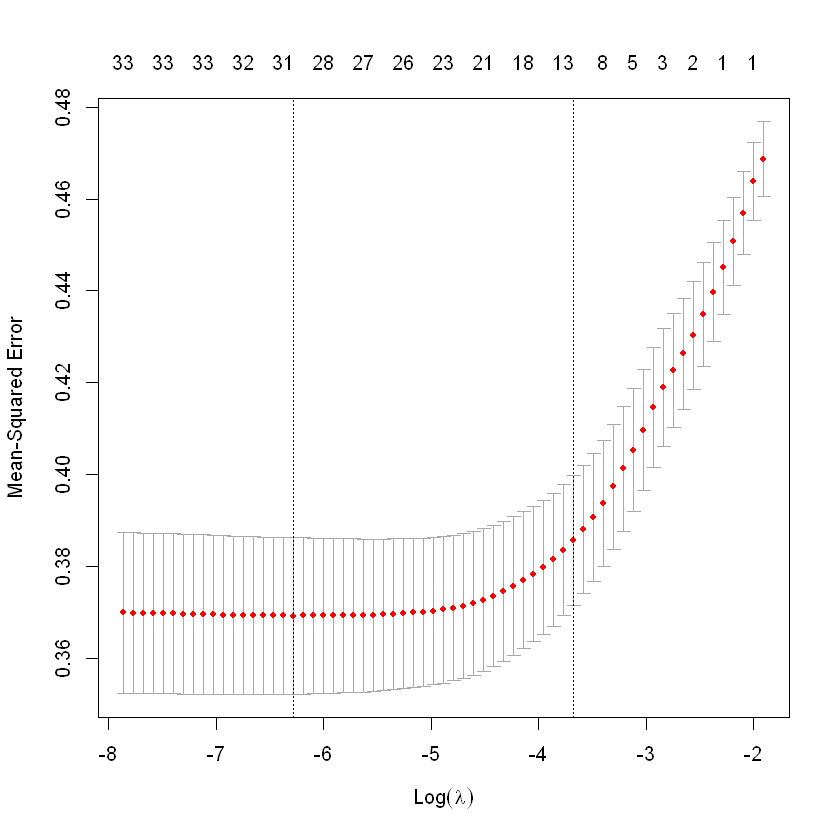

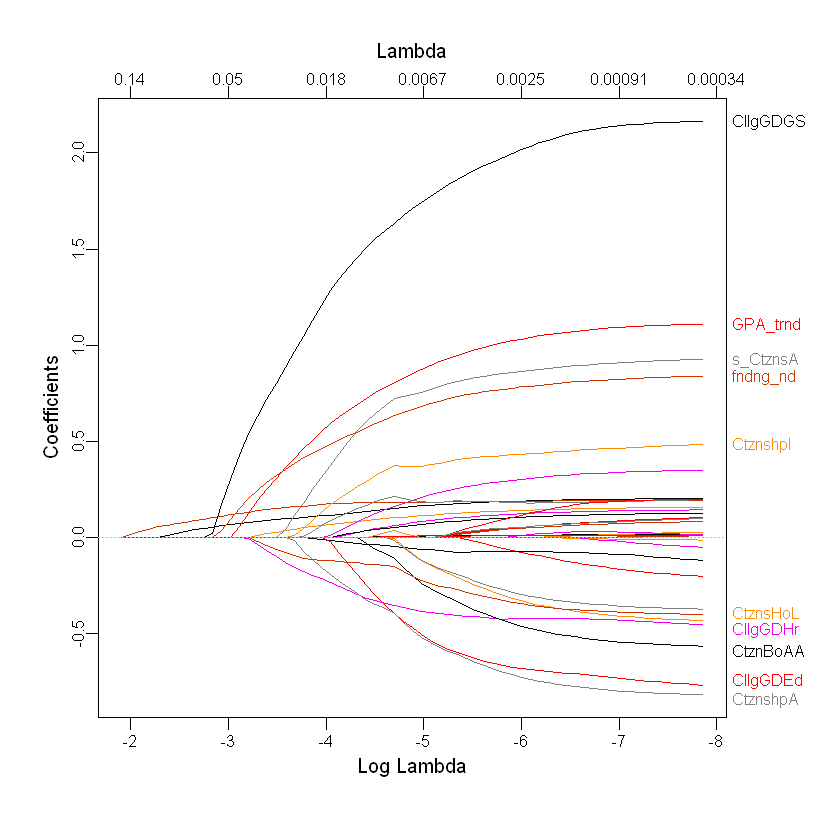

In [157]:
cvfit = cv.glmnet(train_x,train_y,alpha=1,family='binomial',type.measure='mse')
mod_lasso = glmnet(train_x,train_y,alpha=1, family = "binomial",lambda = cvfit$lambda)
plot(cvfit)
plot_glmnet(mod_lasso)
mod_lasso <- glmnet(train_x,train_y,alpha=1, family = "binomial",lambda = cvfit$lambda.min)

In [158]:
lasso_pred = predict(mod_lasso, test_x, type="class")
lasso_right = colSums(lasso_pred == test_y)
(lasso_acc = round(max(lasso_right)/length(test_y),4))

[1] 0.7731

<b> Summary

In [182]:
mod_lasso$beta

34 x 1 sparse Matrix of class "dgCMatrix"
                                                  s0
(Intercept)                              .          
Age                                      0.012195219
Valid.term                               0.193061037
Average_GPA                              0.144742682
academic_period                          0.189119422
s_start_year                            -0.002035415
s_CitizenshipAfrica                      1.144375916
s_CitizenshipAsia                        0.456776234
s_CitizenshipChina                       0.243313098
avs_net_cost                             0.128903534
GenderMale                               0.056371476
s_Average.Precol.GPA                     0.110404216
s_GRE.Combined.General.Write.Score       .          
s_GRE.Combined.Quantitative.Score       -0.105792728
s_GRE.Combined.General.Verbal.Score     -0.074933256
CollegeGD Education                     -0.696550140
CollegeGD Grad School                    2.068023759
Coll

## Prediction Summary

In [160]:
res = data.frame(rbind(lda_acc, nnet_acc, glm_acc,svm_acc,lasso_acc))
colnames(res) = 'Accuracy'
rownames(res) = c('LDA', 'Neural Network', 'Logistic Regression', 'SVM', 'LASSO')
res

,Accuracy
LDA,0.7585
Neural Network,0.8314
Logistic Regression,0.7747
SVM,0.8136
LASSO,0.7731
